### Установка

In [ ]:
!git clone https://github.com/uivvyd/Diffusion-samplers-for-TSF.git

Cloning into 'Diffusion-samplers-for-TSF'...
remote: Enumerating objects: 949, done.
remote: Counting objects: 100% (464/464), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 949 (delta 346), reused 253 (delta 253), pack-reused 485 (from 2)
Receiving objects: 100% (949/949), 9.15 MiB | 609.00 KiB/s, done.
Resolving deltas: 100% (556/556), done.


In [ ]:
%cd Diffusion-samplers-for-TSF

/workdir/Diffusion-samplers-for-TSF


/home/mlcore/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
!ls

checkpoints	    datasets  LICENSE	pyproject.toml	run.sh	     submodules
CODE_OF_CONDUCT.md  docs      notebook	README.md	scripts
config		    exps      probts	run.py		SECURITY.md


In [ ]:
!sudo apt-get install zip unzip -y

sudo: unable to open log file /run/ml-core-sys/sudo.log: Permission denied
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
zip is already the newest version (3.0-12build2).
The following NEW packages will be installed:
  unzip
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 175 kB of archives.
After this operation, 386 kB of additional disk space will be used.
Get:1 http://repo-linux.tcsbank.ru/ubuntu jammy-updates/main amd64 unzip amd64 6.0-26ubuntu3.2 [175 kB]
Fetched 175 kB in 0s (507 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
Selecting previously unselected package unzip.
(Reading database ... 22918 files and directories currently installed.)
Preparing to unpack .../unzip_6.0-26ubuntu3.2_am

In [ ]:
!unzip datasets/all_six_datasets.zip

Archive:  datasets/all_six_datasets.zip
   creating: all_six_datasets/
   creating: all_six_datasets/traffic/
  inflating: __MACOSX/all_six_datasets/._traffic  
  inflating: all_six_datasets/.DS_Store  
  inflating: __MACOSX/all_six_datasets/._.DS_Store  
   creating: all_six_datasets/illness/
  inflating: __MACOSX/all_six_datasets/._illness  
   creating: all_six_datasets/ETT-small/
  inflating: __MACOSX/all_six_datasets/._ETT-small  
   creating: all_six_datasets/weather/
  inflating: __MACOSX/all_six_datasets/._weather  
   creating: all_six_datasets/exchange_rate/
  inflating: __MACOSX/all_six_datasets/._exchange_rate  
   creating: all_six_datasets/electricity/
  inflating: __MACOSX/all_six_datasets/._electricity  
  inflating: all_six_datasets/traffic/.DS_Store  
  inflating: __MACOSX/all_six_datasets/traffic/._.DS_Store  
  inflating: all_six_datasets/traffic/traffic.csv  
  inflating: all_six_datasets/illness/national_illness.csv  
  inflating: all_six_datasets/ETT-small/ETTh1.

In [ ]:
import shutil
import os
import argparse

def move_files_up_one_level(directory):
    for item in os.listdir(directory):
        if item in ['__MACOSX', '.DS_Store', 'all_datasets.zip']:
            continue
        s = os.path.join(directory, item)
        d = os.path.join(os.path.dirname(directory), item)
        if not os.path.exists(d):
            shutil.move(s, d)
        else:
            print(f"skip {item} due to file exist")
            delete_path(s)

    try:
        delete_path(directory)
    except:
        print(f'cannot delete {directory}, skip...')

def cleanup_directory(directory):
    for root, dirs, files in os.walk(directory):
        for name in dirs:
            if name in ['__MACOSX']:
                shutil.rmtree(os.path.join(root, name))

        for name in files:
            if name in ['.DS_Store', 'all_datasets.zip']:
                os.remove(os.path.join(root, name))

def delete_path(path):
    if os.path.exists(path):
        if os.path.isfile(path):
            os.remove(path)
        elif os.path.isdir(path):
            shutil.rmtree(path)

move_files_up_one_level('datasets/all_six_datasets')

In [ ]:
!pip install lightning

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 116.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 14.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 156.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 181.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 198.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 153.1 MB/s eta 0:00:0

In [ ]:
!pip install gluonts

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.9/443.9 kB 154.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 118.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [ ]:
!pip install dotenv

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [ ]:
!pip install reformer-pytorch

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 8.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [ ]:
!pip install linear-attention-transformer

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [ ]:
!pip install utilsforecast

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 8.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [ ]:
!pip install transformers

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 176.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.2/484.2 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 194.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 108.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 72.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [ ]:
!pip install jax

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 MB 86.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 133.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 152.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [ ]:
!pip install scikit-learn

Looking in indexes: https://artifactory.tcsbank.ru/artifactory/api/pypi/python-all/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 209.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 46.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from probts.model.forecaster import LinearForecaster, NaiveForecaster, TSDiffCond
from probts.model.forecast_module import ProbTSForecastModule
from probts.data import ProbTSDataModule, DataManager, ProbTSBatchData
from probts.utils import find_best_epoch
from lightning import Trainer
import torch
import matplotlib.pyplot as plt

In [ ]:
import pytorch_lightning as pl
pl.seed_everything(0)

Seed set to 0


0

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## SSSD, Weather

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def forecast_and_visualize(batch, model, num_chan=10, num_samples=100, batch_idx=0, context_length=96, prediction_length=96):
    batch_data = ProbTSBatchData(batch, model.device)
    past_target_cdf = batch_data.past_target_cdf
    future_target_cdf = batch_data.future_target_cdf
    batch_data.past_target_cdf = model.scaler.transform(batch_data.past_target_cdf)

    with torch.no_grad():
        prediction = model.forecaster.forecast(batch_data, num_samples=num_samples)
        prediction = model.scaler.inverse_transform(prediction)
    prediction = prediction[batch_idx]

    past_range = range(0, context_length)
    future_range = range(context_length, context_length + prediction_length)
    full_range = range(0, context_length + prediction_length)

    q05 = np.quantile(prediction, 0.05, axis=0)
    q95 = np.quantile(prediction, 0.95, axis=0)
    avg = prediction.mean(axis=0)

    if type(num_chan) is int:
        num_chan = range(num_chan)
    for i in num_chan:
        target = torch.cat([past_target_cdf[batch_idx, -context_length:, i], future_target_cdf[batch_idx, :, i]])
        fig, ax = plt.subplots(figsize=(10, 2))
        ax.plot(full_range, target, color='black', alpha=0.7, label='ground truth')
        ax.plot(future_range, avg[:, i], color='orange', label='average forecasts')
        ax.fill_between(future_range, q05[:, i], q95[:, i], color='orange', alpha=.4, label='interval:0.9')
        plt.legend(loc="center left", bbox_to_anchor=(1.04, 0.5));

In [ ]:
import time

def time_for_forecast(batch, model, n_repeats=10):
    batch_data = ProbTSBatchData(batch, model.device)
    total_time = 0

    for i in range(n_repeats):
        start_time = time.time()
        with torch.no_grad():
            prediction = model.forecaster.forecast(batch_data, num_samples=1)
        total_time += (time.time() - start_time)
    total_time /= n_repeats
    return total_time

In [ ]:
from tqdm import tqdm

def check_metrics_for_samplers(test_dataloader, model, trainer, steps):
    metrics = []
    for num_steps in tqdm(steps):
        model.forecaster.solver_num_steps = num_steps
        res = trainer.test(model=model, dataloaders=test_dataloader)
        metrics += res
    return metrics

In [ ]:
data_manager = DataManager(
    dataset='weather_ltsf',
    path='datasets',
    context_length=96,
    prediction_length=96,
    scaler='standard',
)

data_module = ProbTSDataModule(
    data_manager=data_manager,
    batch_size=8,
    test_batch_size=8,
    num_workers=8,
)
test_dataloader = data_module.test_dataloader()

Loading Long-term Dataset: weather_ltsf
val  pred_len: 96 : num_test_windows: 54
test  pred_len: 96 : num_test_windows: 109
Test context length: [96], prediction length: [96]
Validation context length: [96], prediction length: [96]
Training context length: [96], prediction lengths: [96]
Test rolling length: 96
Variable-specific normalization: True


In [ ]:
for batch in test_dataloader:
    break

def vis(batch, model, num_chan=21, batch_idx=0, context_length=96, prediction_length=96):
    batch_data = ProbTSBatchData(batch, model.device)
    past_target_cdf = model.scaler.transform(batch_data.past_target_cdf)
    future_target_cdf = model.scaler.transform(batch_data.future_target_cdf)
    past_target_cdf = batch_data.past_target_cdf
    future_target_cdf = batch_data.future_target_cdf
    batch_data.past_target_cdf = past_target_cdf

    past_range = range(0, context_length)
    future_range = range(context_length, context_length + prediction_length)
    full_range = range(0, context_length + prediction_length)

    if type(num_chan) is int:
        num_chan = range(num_chan)
    for i in num_chan:
        target = torch.cat([past_target_cdf[batch_idx, -context_length:, i], future_target_cdf[batch_idx, :, i]])
        fig, ax = plt.subplots(figsize=(10, 2))
        ax.plot(full_range, target, color='black', alpha=0.7, label='ground truth')
        plt.show()

In [ ]:
k = 0
for data in test_dataloader:
    print(data['future_target_cdf'].shape)
    break

torch.Size([8, 96, 21])


In [ ]:
forecaster = TSDiffCond(
    individual=True,
    use_lags=False,
    use_feat_idx_emb=False,
    use_time_feat=False,
    target_dim=data_manager.target_dim,
    context_length=data_manager.context_length,
    prediction_length=data_manager.prediction_length,
    freq=data_manager.freq,
    lags_list=data_manager.lags_list,
    time_feat_dim=data_manager.time_feat_dim,
    dataset=data_manager.dataset,

      timesteps=500,
      hidden_dim=64,
      step_emb=128,
      num_residual_blocks=3,
      use_scaling=False
)

model = ProbTSForecastModule(
    forecaster=forecaster,
    scaler=data_manager.scaler,
    learning_rate=0.001,
    quantiles_num=20,
)
## weights_only=False in load_from_checkpoint save_utils.py
# model = model.load_from_checkpoint('../traffic_ltsf_epoch=49-step=5000.ckpt')
model = model.load_from_checkpoint('../weather_tsdiff_epoch=69-step=1750.ckpt')

sampling_weight_scheme: none
sampling_weight_scheme: none


In [ ]:
model.scaler

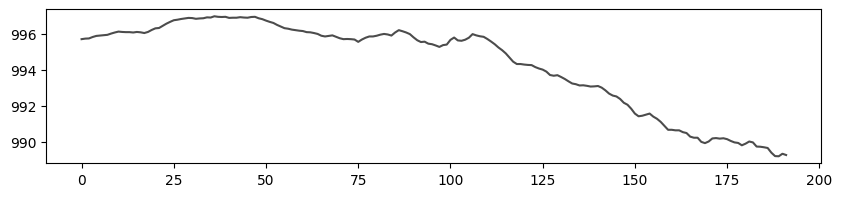

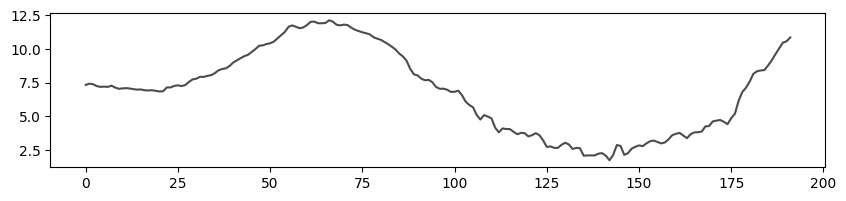

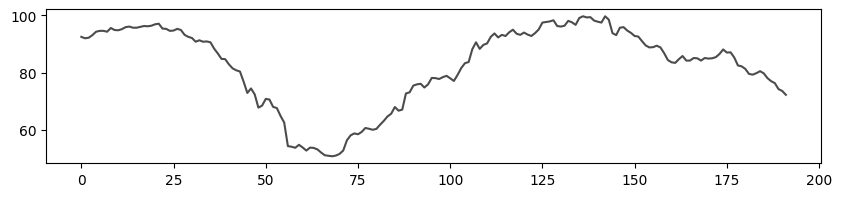

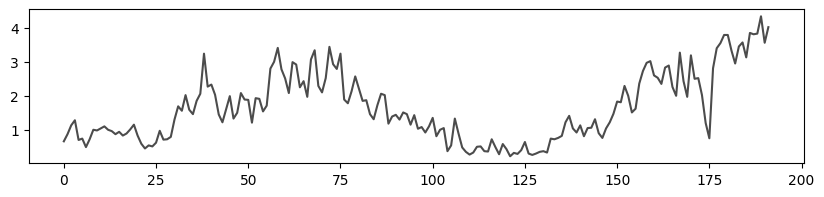

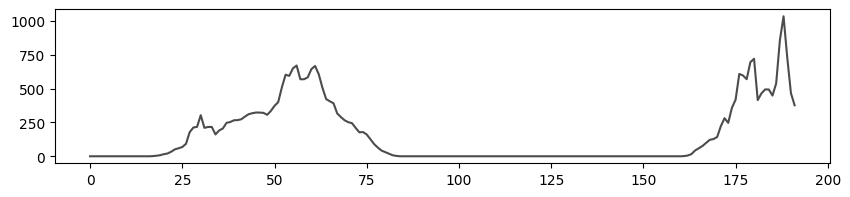

In [ ]:
model.scaler = data_manager.scaler

vis(batch, model, num_chan=[0, 1, 4, 11, 18], batch_idx=0, context_length=96, prediction_length=96)

In [ ]:
trainer = Trainer(
    accelerator="gpu",
    devices=1,
    strategy="auto",
    max_epochs=50,
    use_distributed_sampler=False,
    limit_train_batches=100,
    log_every_n_steps=1,
    accumulate_grad_batches=1,
    default_root_dir='./results',
  check_val_every_n_epoch= 1,
  gradient_clip_val=0.5
)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


### DDPM

In [ ]:
model.scaler = data_manager.scaler
model.forecaster.solver = 'ddpm'
model.forecaster.solver_num_steps = 500
model.forecaster.solver_schedule = 'linear'

In [ ]:
for batch in test_dataloader:
    break

time_for_forecast(batch, model, n_repeats=5)

11.055792188644409

In [ ]:
res = trainer.test(model=model, dataloaders=test_dataloader);

You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.0851731151342392
    96_test_CRPS-Sum       0.052501317113637924
      96_test_MASE           25.37761688232422
       96_test_MSE            3988.9482421875
     96_test_MSE-Sum           178257.96875
       96_test_ND           0.11037103831768036
     96_test_ND-Sum         0.07000770419836044
      96_test_NRMSE         0.3355656862258911
    96_test_NRMSE-Sum       0.10343551635742188
   96_test_weighted_ND      0.11037103831768036
 96_test_weighted_ND-Sum    0.07000770419836044
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
res

[{'96_test_ND': 0.11037103831768036,
  '96_test_ND-Sum': 0.07000770419836044,
  '96_test_weighted_ND': 0.11037103831768036,
  '96_test_weighted_ND-Sum': 0.07000770419836044,
  '96_test_CRPS': 0.0851731151342392,
  '96_test_CRPS-Sum': 0.052501317113637924,
  '96_test_NRMSE': 0.3355656862258911,
  '96_test_NRMSE-Sum': 0.10343551635742188,
  '96_test_MSE': 3988.9482421875,
  '96_test_MSE-Sum': 178257.96875,
  '96_test_MASE': 25.37761688232422}]

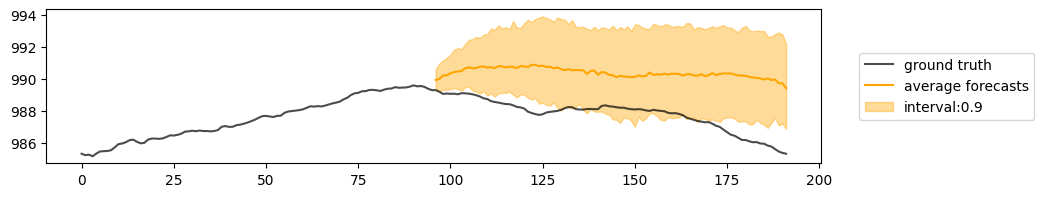

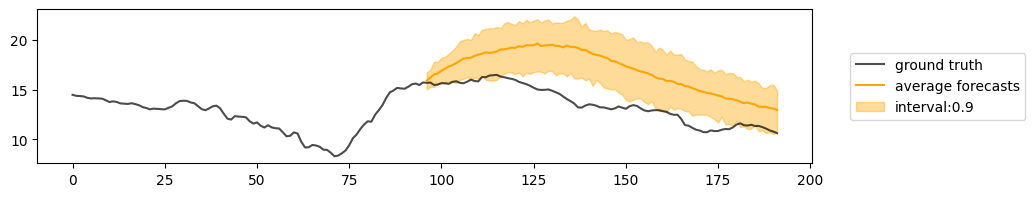

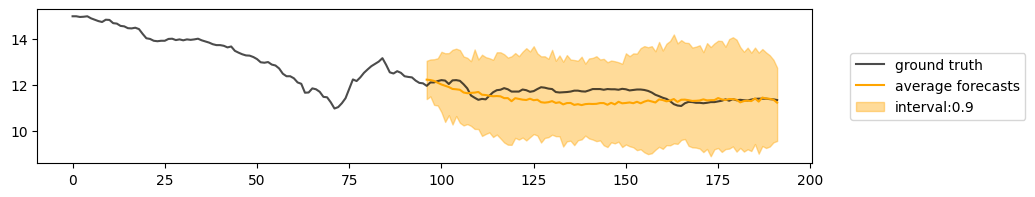

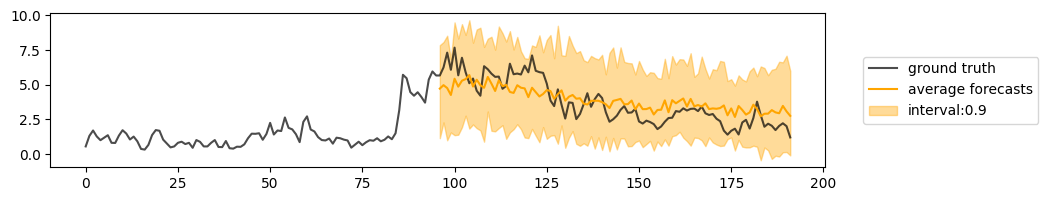

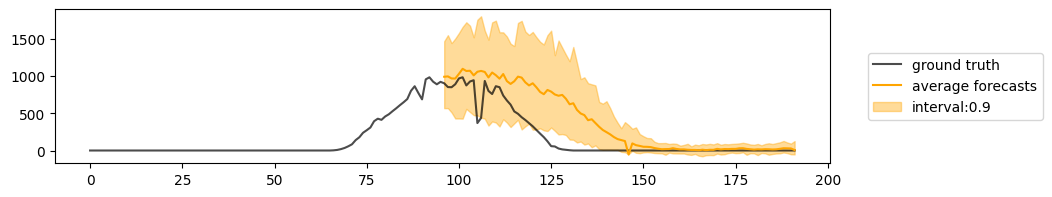

In [ ]:
forecast_and_visualize(batch, model, num_chan=[0, 1, 6, 11, 18], num_samples=50, batch_idx=7, context_length=96, prediction_length=96)

### Euler

In [ ]:
model.scaler = data_manager.scaler
model.forecaster.solver = 'euler'
model.forecaster.solver_num_steps = 15
model.forecaster.solver_schedule = 'linear'

for batch in test_dataloader:
    break

In [ ]:
steps = [10, 15, 20, 30, 50, 100]
euler_time = []
for num_steps in tqdm(steps):
    model.forecaster.solver_num_steps = num_steps
    euler_time.append(time_for_forecast(batch, model, n_repeats=1))
euler_time

100%|██████████| 6/6 [00:04<00:00,  1.28it/s]


[0.2774186134338379,
 0.28720569610595703,
 0.41248655319213867,
 0.5960090160369873,
 1.012953281402588,
 2.0985639095306396]

In [ ]:
euler_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=[10, 15, 20, 30, 50, 100])

  0%|          | 0/6 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:33<02:46, 33.22s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS           6.742316246032715
    96_test_CRPS-Sum         5.501935958862305
      96_test_MASE           2137.381591796875
       96_test_MSE              11200978.0
     96_test_MSE-Sum            384012992.0
       96_test_ND            6.944308280944824
     96_test_ND-Sum          5.617013931274414
      96_test_NRMSE         20.061086654663086
    96_test_NRMSE-Sum        5.592775821685791
   96_test_weighted_ND       6.944308280944824
 96_test_weighted_ND-Sum     5.617013931274414
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [01:07<02:14, 33.74s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.13682423532009125
    96_test_CRPS-Sum        0.06881806254386902
      96_test_MASE          30.041379928588867
       96_test_MSE            4431.2080078125
     96_test_MSE-Sum           151036.859375
       96_test_ND           0.13897886872291565
     96_test_ND-Sum         0.0839664414525032
      96_test_NRMSE         0.3802317678928375
    96_test_NRMSE-Sum       0.10251873731613159
   96_test_weighted_ND      0.13897886872291565
 96_test_weighted_ND-Sum    0.0839664414525032
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [01:41<01:41, 33.90s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.11725695431232452
    96_test_CRPS-Sum       0.062106139957904816
      96_test_MASE          28.279356002807617
       96_test_MSE           3784.311279296875
     96_test_MSE-Sum           163450.109375
       96_test_ND           0.12947413325309753
     96_test_ND-Sum          0.080731101334095
      96_test_NRMSE          0.339091420173645
    96_test_NRMSE-Sum       0.10384924709796906
   96_test_weighted_ND      0.12947413325309753
 96_test_weighted_ND-Sum     0.080731101334095
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 67%|██████▋   | 4/6 [02:16<01:08, 34.30s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.1017746552824974
    96_test_CRPS-Sum        0.05664224922657013
      96_test_MASE          27.209104537963867
       96_test_MSE           3786.722412109375
     96_test_MSE-Sum            164836.9375
       96_test_ND           0.12214072048664093
     96_test_ND-Sum         0.07635964453220367
      96_test_NRMSE         0.3367442190647125
    96_test_NRMSE-Sum       0.10350470244884491
   96_test_weighted_ND      0.12214072048664093
 96_test_weighted_ND-Sum    0.07635964453220367
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [02:52<00:35, 35.15s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.09149898588657379
    96_test_CRPS-Sum        0.05345122888684273
      96_test_MASE          26.413604736328125
       96_test_MSE           3782.359619140625
     96_test_MSE-Sum           164685.234375
       96_test_ND           0.11632274836301804
     96_test_ND-Sum         0.07234584540128708
      96_test_NRMSE         0.3330047130584717
    96_test_NRMSE-Sum       0.10175976902246475
   96_test_weighted_ND      0.11632274836301804
 96_test_weighted_ND-Sum    0.07234584540128708
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

100%|██████████| 6/6 [03:34<00:00, 35.67s/it]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.08652444183826447
    96_test_CRPS-Sum        0.05244099721312523
      96_test_MASE          25.795927047729492
       96_test_MSE           3831.448974609375
     96_test_MSE-Sum           167620.546875
       96_test_ND           0.11260876059532166
     96_test_ND-Sum         0.07071465998888016
      96_test_NRMSE         0.3341212868690491
    96_test_NRMSE-Sum       0.10234596580266953
   96_test_weighted_ND      0.11260876059532166
 96_test_weighted_ND-Sum    0.07071465998888016
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
import pickle
with open("euler_metrics_sssd.pkl", "wb") as fp:
   pickle.dump(euler_metrics, fp)

10


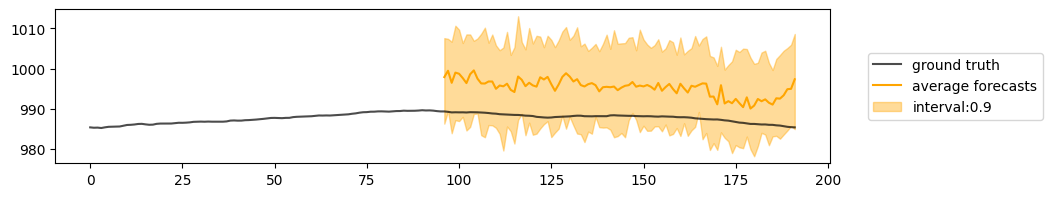

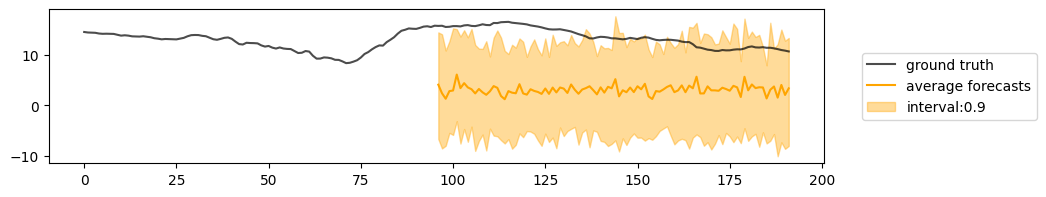

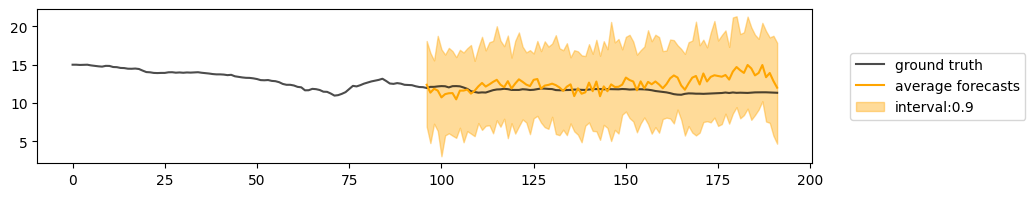

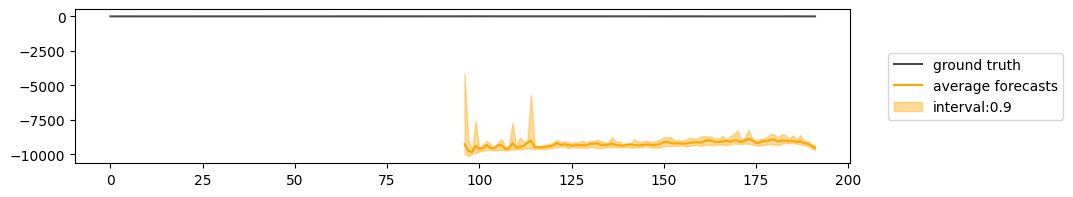

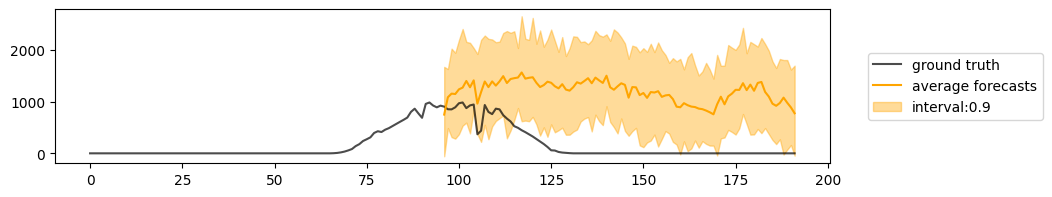

15


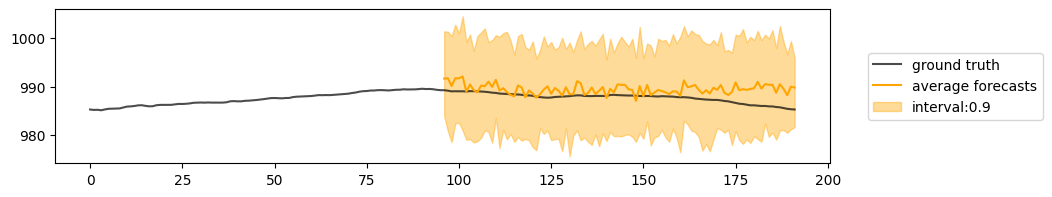

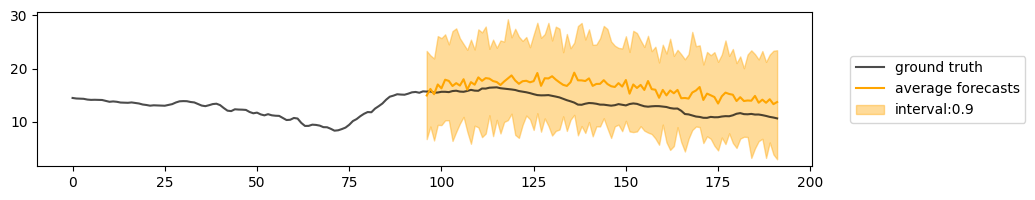

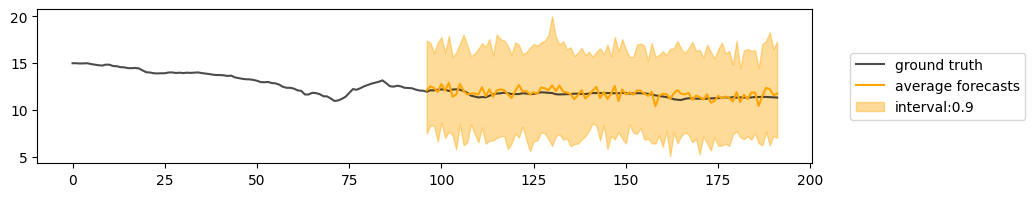

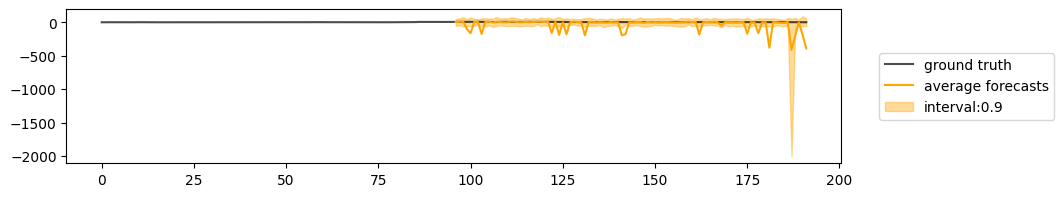

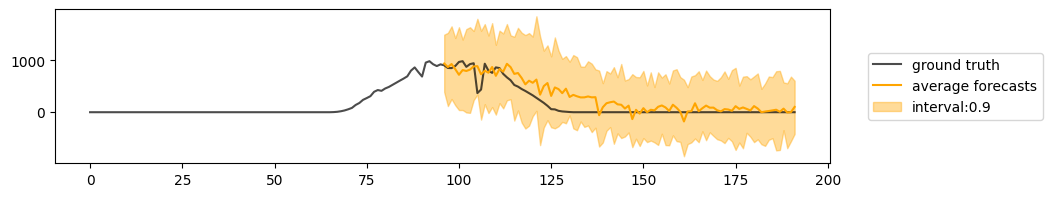

20


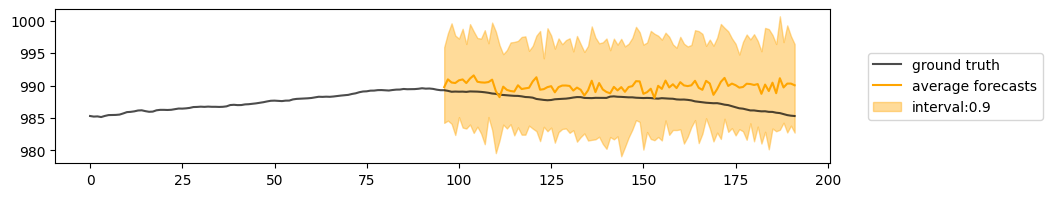

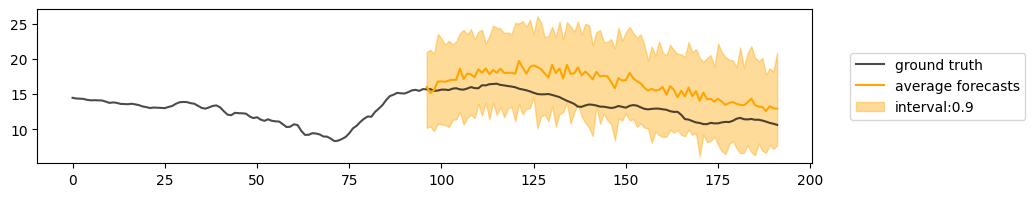

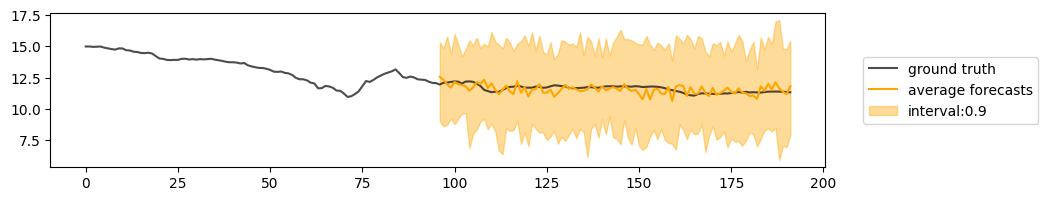

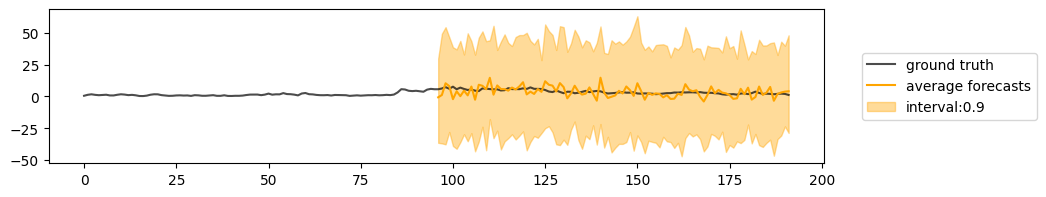

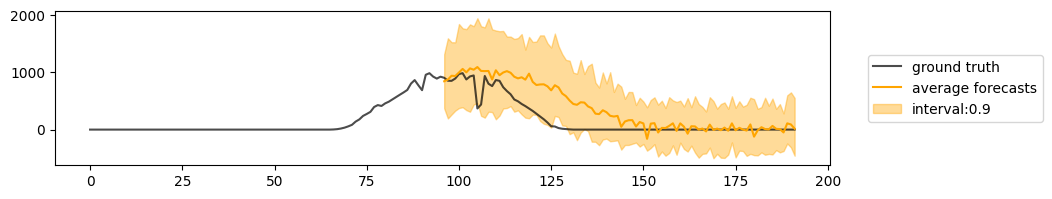

30


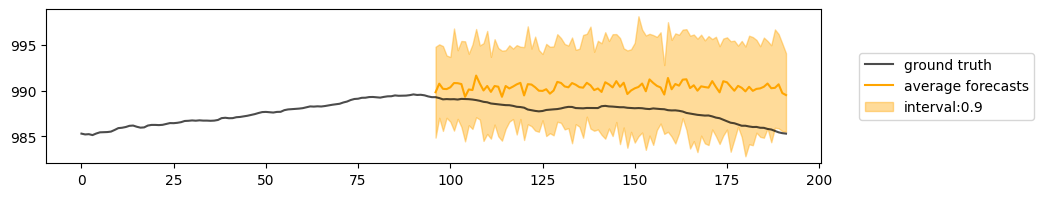

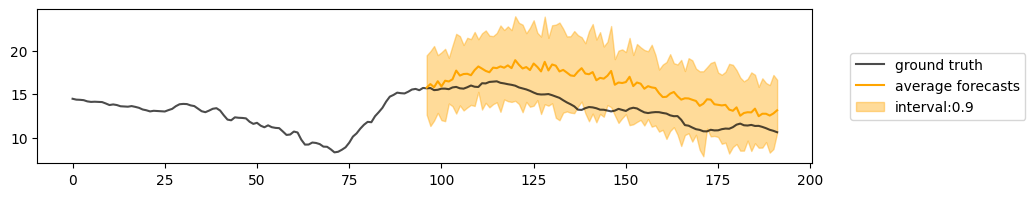

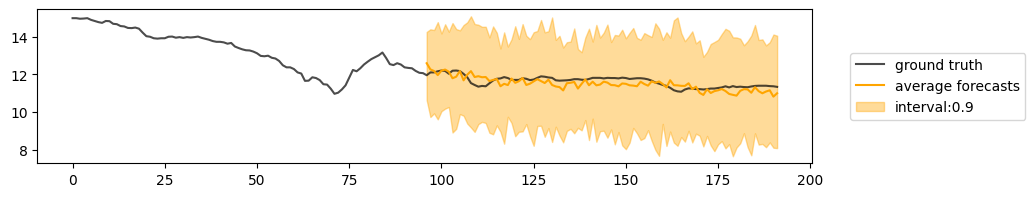

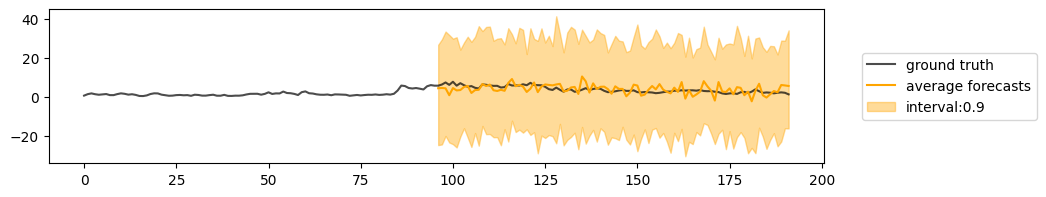

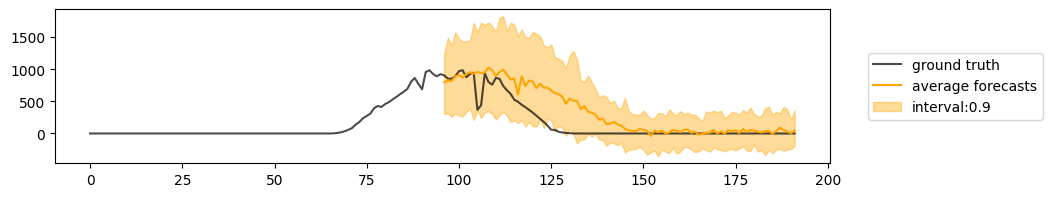

50


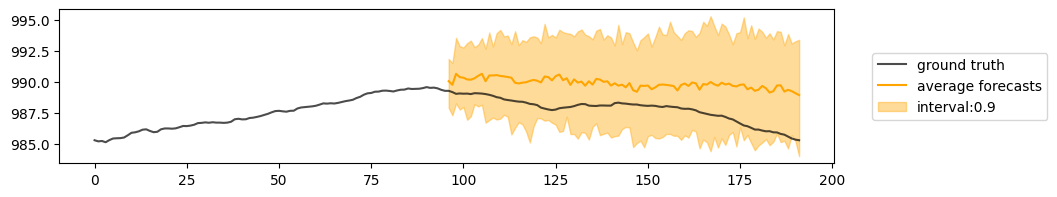

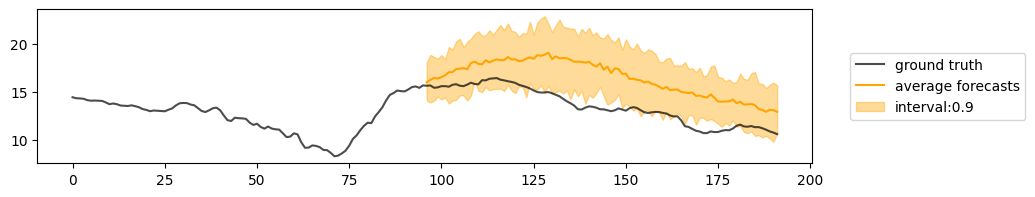

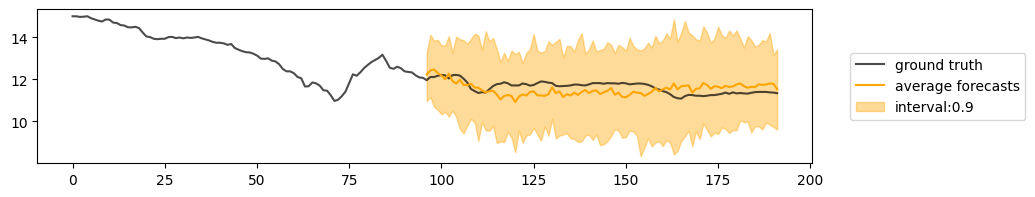

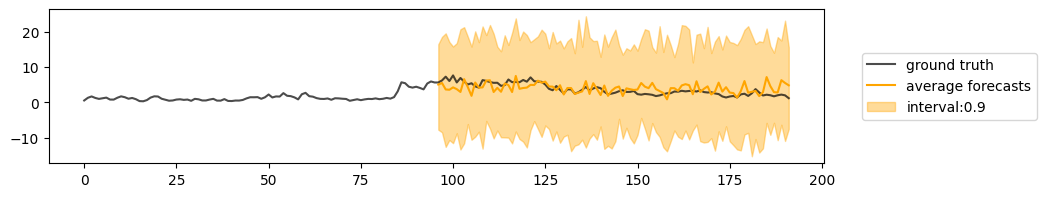

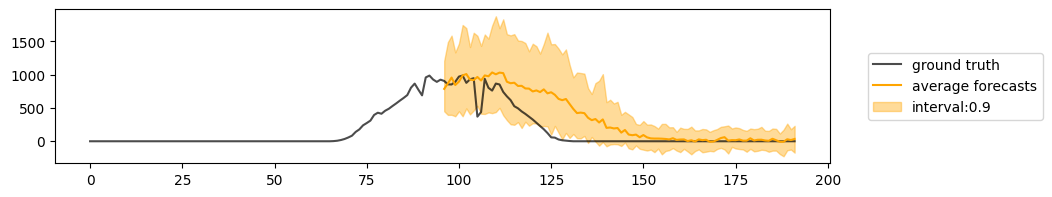

100


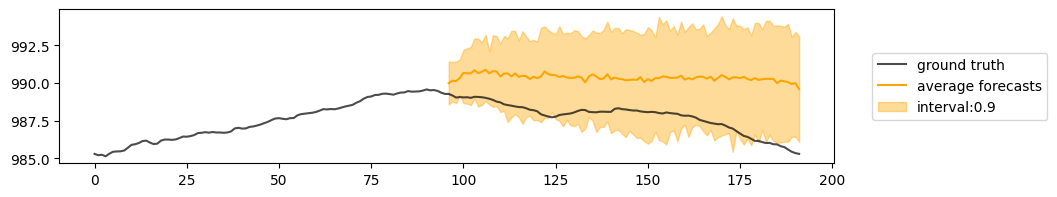

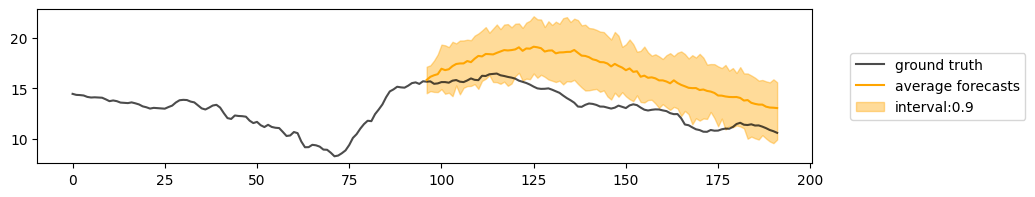

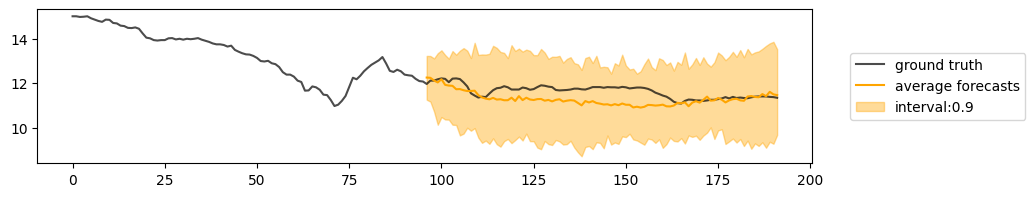

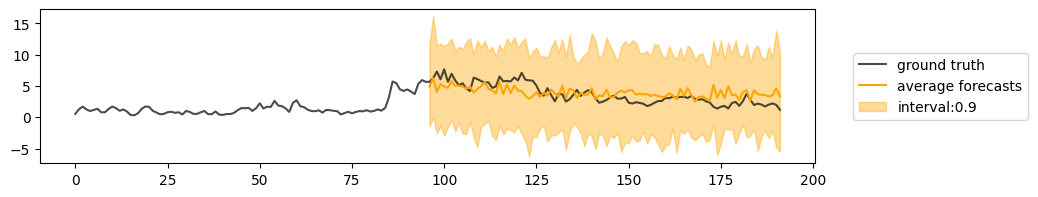

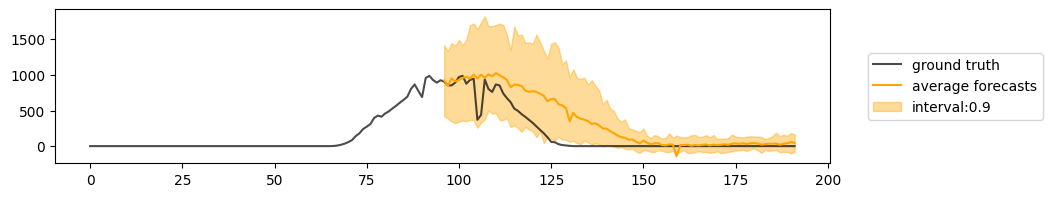

In [ ]:
for num_steps in steps:
    print(num_steps)
    model.forecaster.solver_num_steps = num_steps
    forecast_and_visualize(batch, model, num_chan=[0, 1, 6, 11, 18], num_samples=50, batch_idx=7, context_length=96, prediction_length=96)
    plt.show()

### Heun

In [ ]:
model.forecaster.solver = 'heun'
model.scaler = data_manager.scaler
model.forecaster.solver_num_steps = 15
model.forecaster.solver_schedule = 'linear'
steps = [10, 15, 20, 30, 50, 100]

for batch in test_dataloader:
    break

In [ ]:
heun_time = []
for num_steps in tqdm(steps):
    model.forecaster.solver_num_steps = num_steps // 2
    heun_time.append(time_for_forecast(batch, model, n_repeats=1))
heun_time

100%|██████████| 6/6 [00:04<00:00,  1.27it/s]


[0.2021803855895996,
 0.252669095993042,
 0.3924448490142822,
 0.7760319709777832,
 1.0087370872497559,
 2.085756301879883]

In [ ]:
heun_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=[step // 2 for step in steps])

  0%|          | 0/6 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:33<02:46, 33.32s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS           7.211589336395264
    96_test_CRPS-Sum         3.043004274368286
      96_test_MASE           849.5562744140625
       96_test_MSE               4283981.0
     96_test_MSE-Sum            32399164.0
       96_test_ND            5.146236419677734
     96_test_ND-Sum          1.454439401626587
      96_test_NRMSE         12.403873443603516
    96_test_NRMSE-Sum       1.6171761751174927
   96_test_weighted_ND       5.146236419677734
 96_test_weighted_ND-Sum     1.454439401626587
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [01:07<02:14, 33.67s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS           5.306901454925537
    96_test_CRPS-Sum        3.8350281715393066
      96_test_MASE             1691.02734375
       96_test_MSE               7232303.5
     96_test_MSE-Sum            236357680.0
       96_test_ND            5.591174602508545
     96_test_ND-Sum         4.4112019538879395
      96_test_NRMSE          16.1195068359375
    96_test_NRMSE-Sum       4.3875274658203125
   96_test_weighted_ND       5.591174602508545
 96_test_weighted_ND-Sum    4.4112019538879395
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [01:41<01:41, 33.75s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          1.2426409721374512
    96_test_CRPS-Sum        0.9702956080436707
      96_test_MASE           189.8357391357422
       96_test_MSE              1671828.125
     96_test_MSE-Sum            61113160.0
       96_test_ND           0.8270329236984253
     96_test_ND-Sum         0.4822577238082886
      96_test_NRMSE          7.748251914978027
    96_test_NRMSE-Sum        2.229218006134033
   96_test_weighted_ND      0.8270329236984253
 96_test_weighted_ND-Sum    0.4822577238082886
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 67%|██████▋   | 4/6 [02:15<01:08, 34.08s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.1055629625916481
    96_test_CRPS-Sum        0.05156475678086281
      96_test_MASE           33.13198471069336
       96_test_MSE           3420.00439453125
     96_test_MSE-Sum           124131.953125
       96_test_ND           0.14370718598365784
     96_test_ND-Sum         0.07130956649780273
      96_test_NRMSE         0.33162084221839905
    96_test_NRMSE-Sum       0.09229297935962677
   96_test_weighted_ND      0.14370718598365784
 96_test_weighted_ND-Sum    0.07130956649780273
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [02:51<00:34, 34.87s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.09029286354780197
    96_test_CRPS-Sum       0.050808921456336975
      96_test_MASE          28.061704635620117
       96_test_MSE            3344.3623046875
     96_test_MSE-Sum            136936.4375
       96_test_ND           0.1190439984202385
     96_test_ND-Sum         0.06926771253347397
      96_test_NRMSE         0.3183176517486572
    96_test_NRMSE-Sum       0.09498527646064758
   96_test_weighted_ND      0.1190439984202385
 96_test_weighted_ND-Sum    0.06926771253347397
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

100%|██████████| 6/6 [03:32<00:00, 35.45s/it]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.08487343043088913
    96_test_CRPS-Sum        0.05041130259633064
      96_test_MASE          26.450788497924805
       96_test_MSE           3461.481689453125
     96_test_MSE-Sum           147005.28125
       96_test_ND           0.11073827743530273
     96_test_ND-Sum         0.06782325357198715
      96_test_NRMSE         0.3183131814002991
    96_test_NRMSE-Sum       0.09649350494146347
   96_test_weighted_ND      0.11073827743530273
 96_test_weighted_ND-Sum    0.06782325357198715
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
import pickle
with open("heun_metrics_sssd.pkl", "wb") as fp:
   pickle.dump(heun_metrics, fp)

10


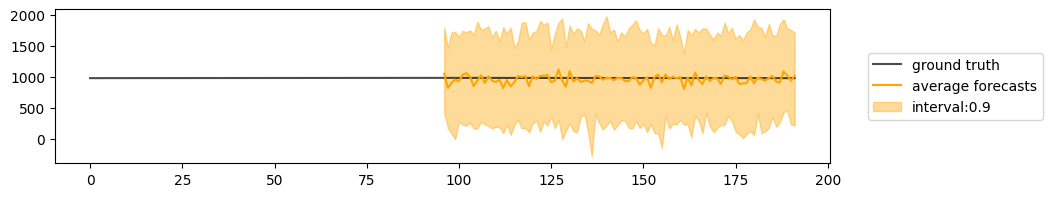

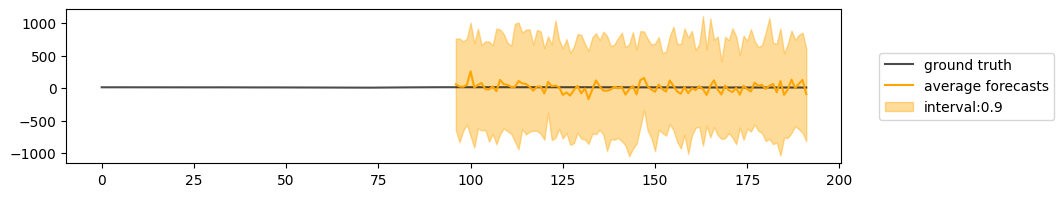

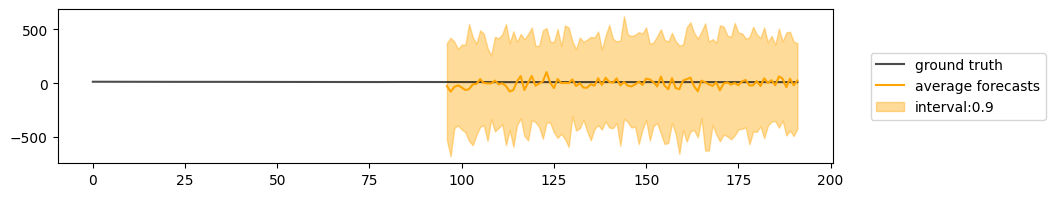

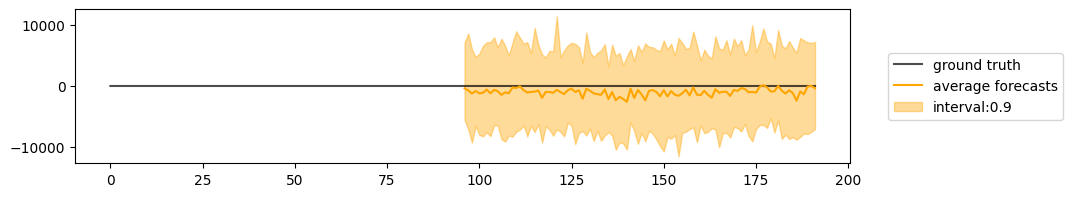

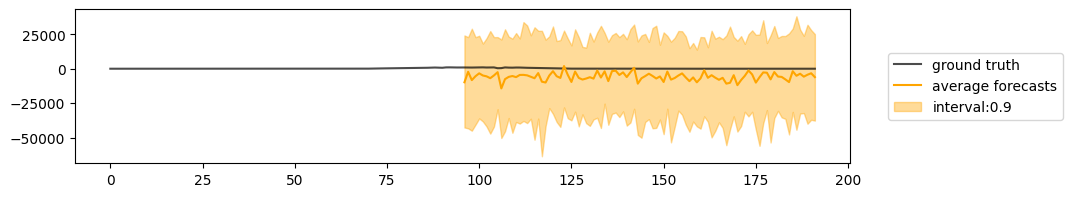

15


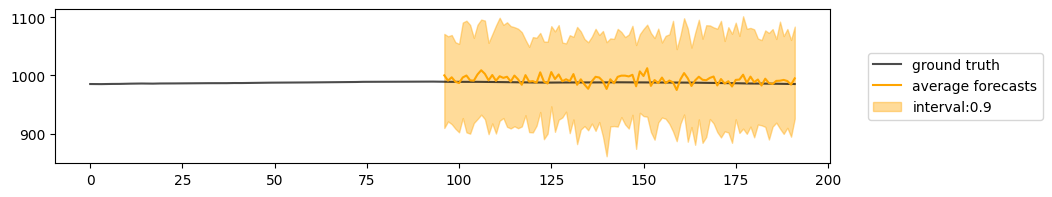

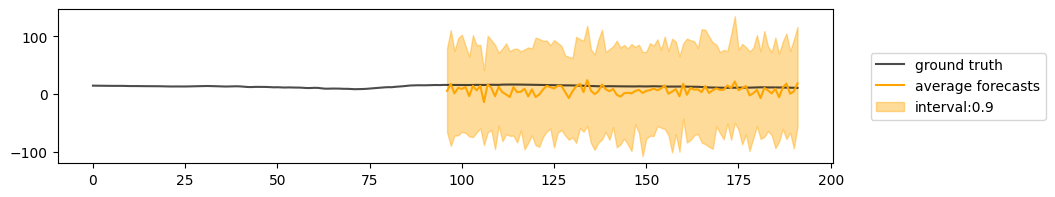

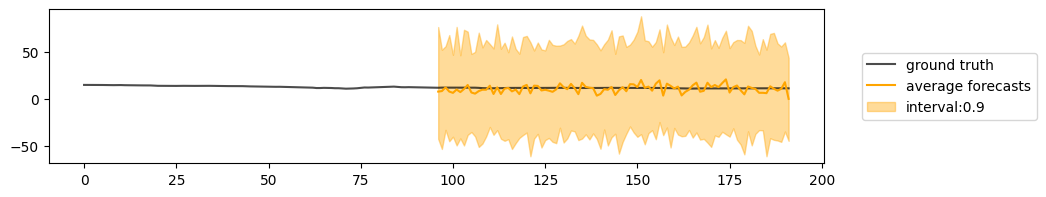

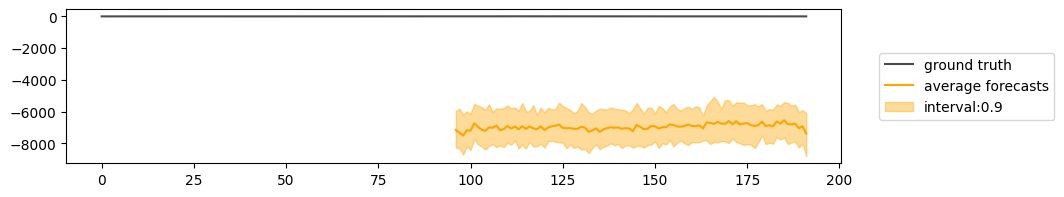

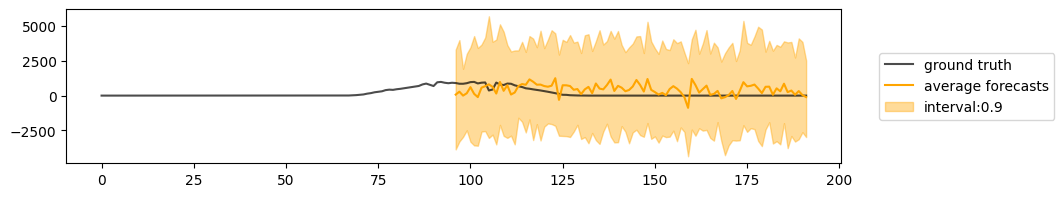

20


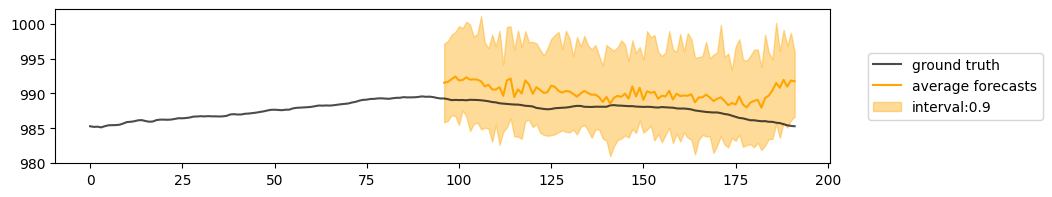

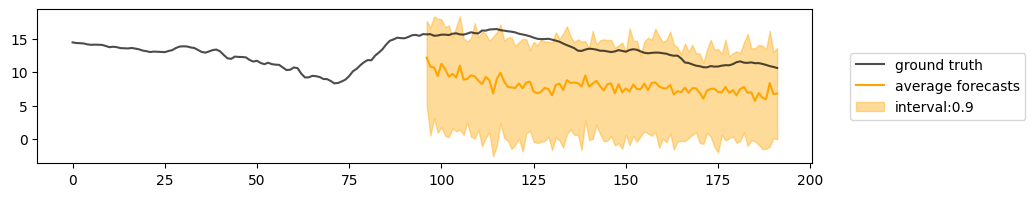

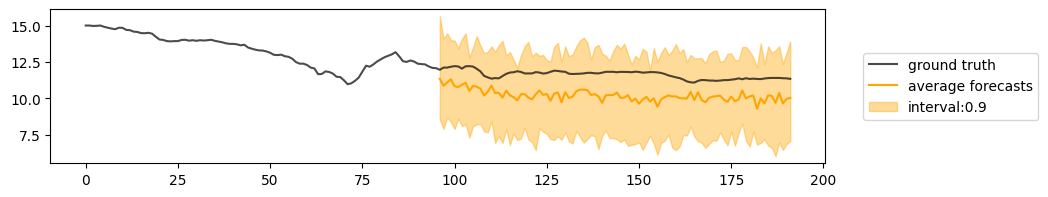

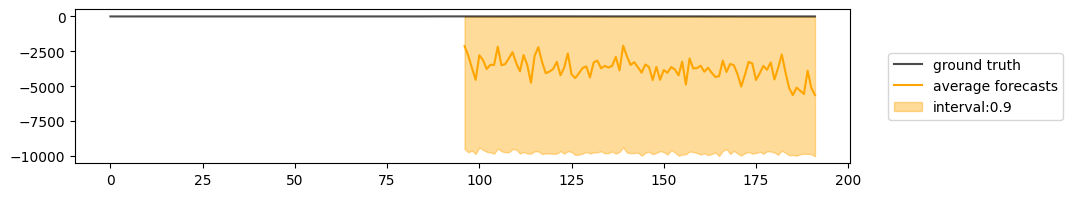

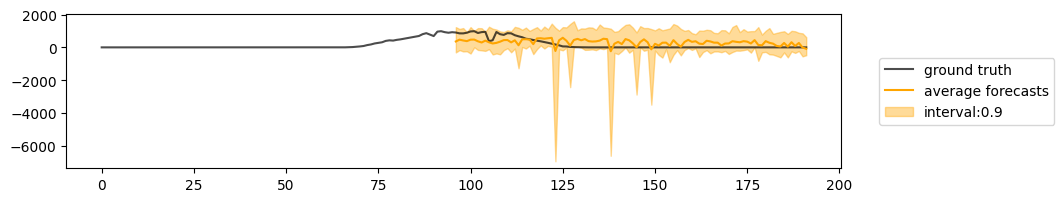

30


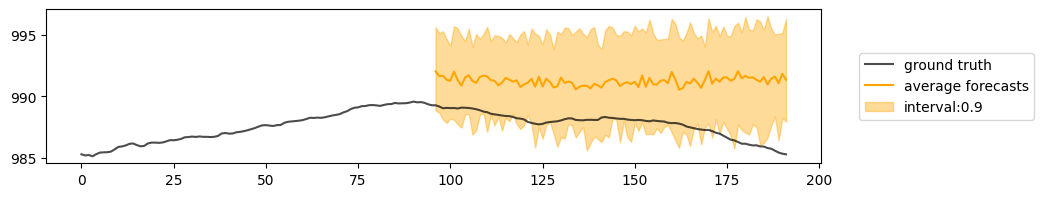

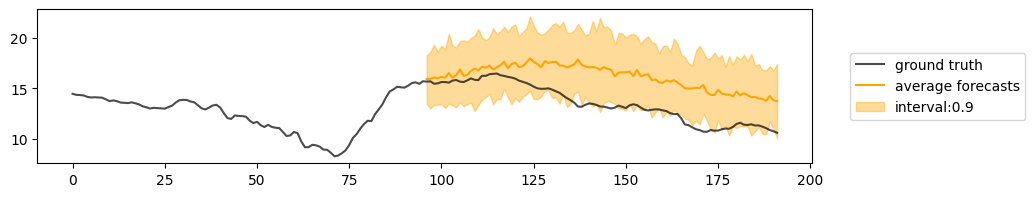

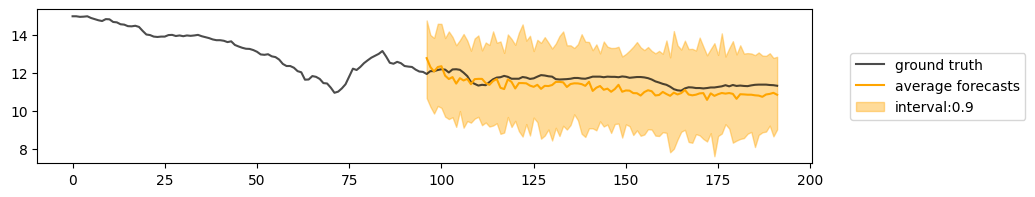

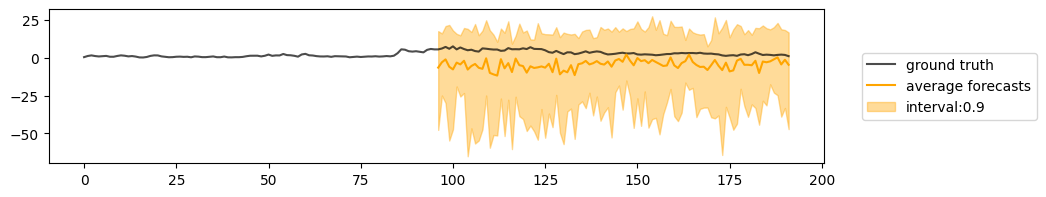

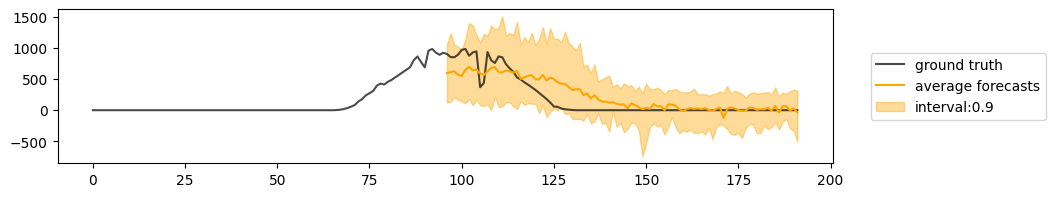

50


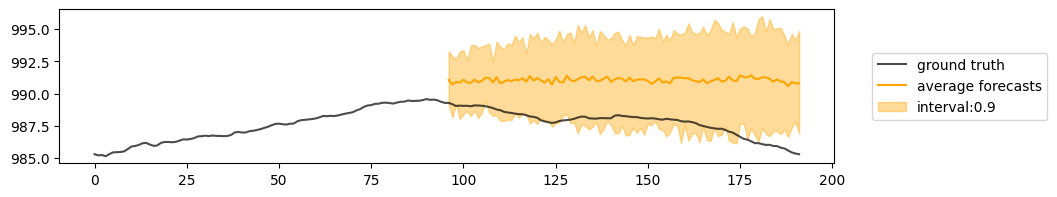

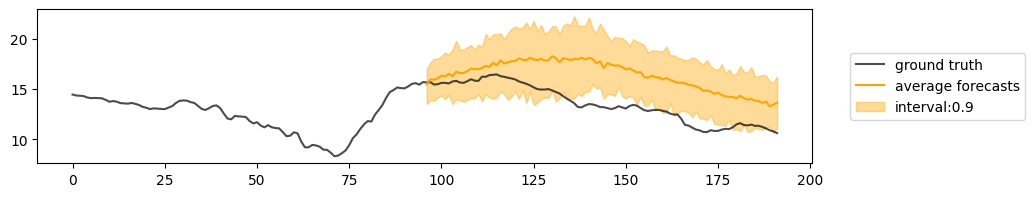

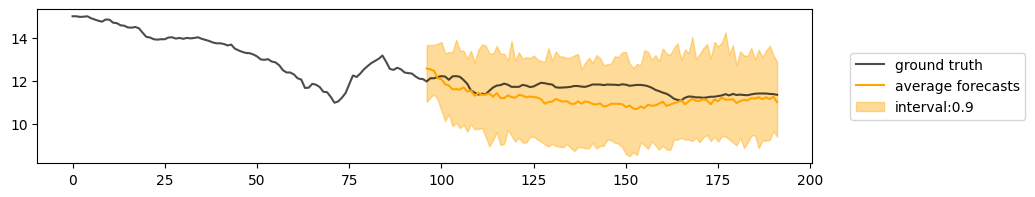

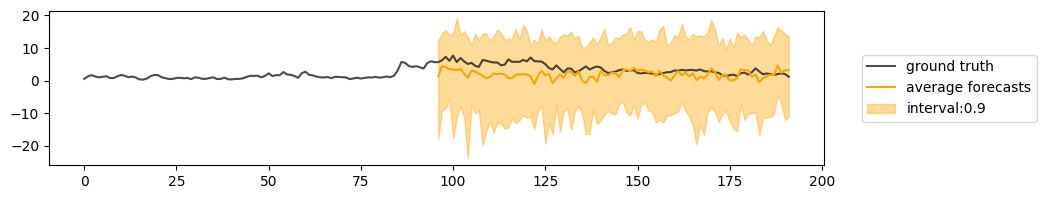

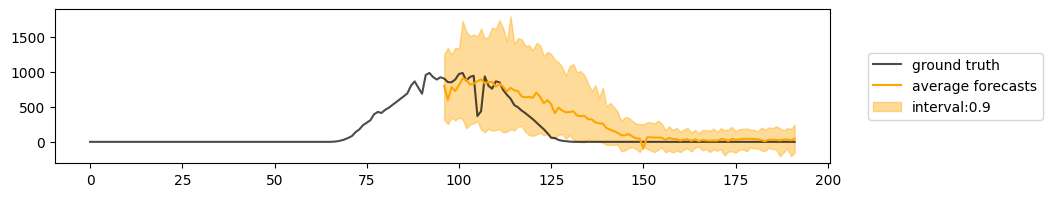

100


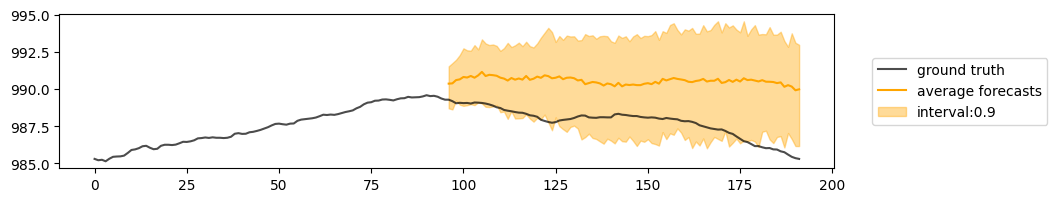

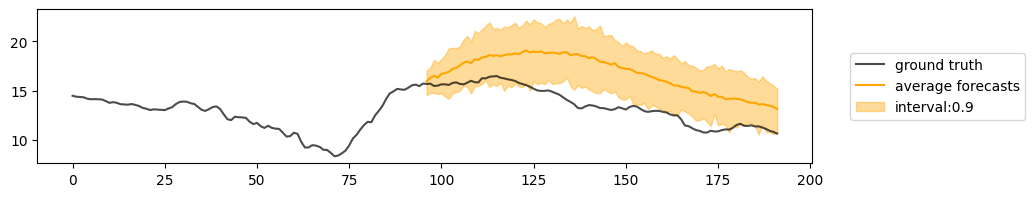

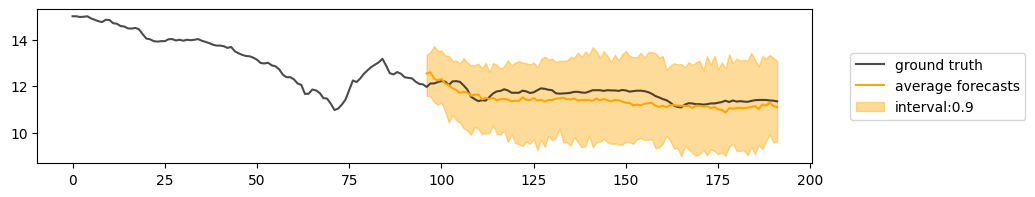

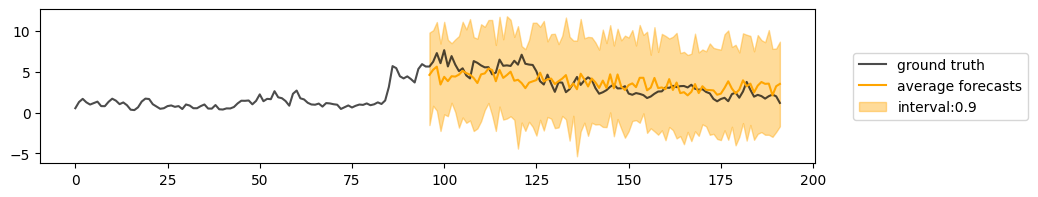

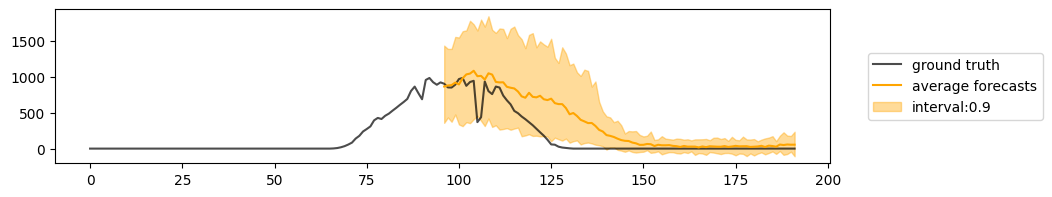

In [ ]:
for num_steps in steps:
    print(num_steps)
    model.forecaster.solver_num_steps = num_steps // 2
    forecast_and_visualize(batch, model, num_chan=[0, 1, 6, 11, 18], num_samples=50, batch_idx=7, context_length=96, prediction_length=96)
    plt.show()

### DDIM, quad

In [ ]:
model.forecaster.solver = 'ddim'
model.forecaster.solver_schedule = 'quad'

for batch in test_dataloader:
    break

In [ ]:
ddim_time = []
for num_steps in tqdm(steps):
    model.forecaster.solver_num_steps = num_steps
    ddim_time.append(time_for_forecast(batch, model, n_repeats=1))
ddim_time

100%|██████████| 6/6 [00:04<00:00,  1.27it/s]


[0.21702075004577637,
 0.2976109981536865,
 0.39676976203918457,
 0.6294100284576416,
 1.0533051490783691,
 2.1120402812957764]

In [ ]:
ddim_quad_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=steps)

  0%|          | 0/6 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:32<02:44, 32.96s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.20098355412483215
    96_test_CRPS-Sum        0.12637141346931458
      96_test_MASE           64.74055480957031
       96_test_MSE            17402.388671875
     96_test_MSE-Sum             643357.75
       96_test_ND           0.2532641291618347
     96_test_ND-Sum         0.16091859340667725
      96_test_NRMSE         0.7536066770553589
    96_test_NRMSE-Sum       0.21210679411888123
   96_test_weighted_ND      0.2532641291618347
 96_test_weighted_ND-Sum    0.16091859340667725
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [01:06<02:12, 33.18s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.13966260850429535
    96_test_CRPS-Sum        0.08946201950311661
      96_test_MASE           43.35982131958008
       96_test_MSE             8844.6796875
     96_test_MSE-Sum           383112.96875
       96_test_ND           0.17648959159851074
     96_test_ND-Sum         0.11566443741321564
      96_test_NRMSE         0.5307554006576538
    96_test_NRMSE-Sum       0.1629299521446228
   96_test_weighted_ND      0.17648959159851074
 96_test_weighted_ND-Sum    0.11566443741321564
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [01:40<01:40, 33.44s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.12007713317871094
    96_test_CRPS-Sum        0.07610239833593369
      96_test_MASE          36.163475036621094
       96_test_MSE           6689.02783203125
     96_test_MSE-Sum           289470.15625
       96_test_ND           0.15311793982982635
     96_test_ND-Sum         0.09992922842502594
      96_test_NRMSE         0.45973482728004456
    96_test_NRMSE-Sum       0.14124080538749695
   96_test_weighted_ND      0.15311793982982635
 96_test_weighted_ND-Sum    0.09992922842502594
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 67%|██████▋   | 4/6 [02:14<01:07, 33.92s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.11475414037704468
    96_test_CRPS-Sum        0.07385937124490738
      96_test_MASE          33.819427490234375
       96_test_MSE           6458.39697265625
     96_test_MSE-Sum           288347.21875
       96_test_ND           0.14719389379024506
     96_test_ND-Sum         0.09722234308719635
      96_test_NRMSE         0.4496368169784546
    96_test_NRMSE-Sum       0.14060811698436737
   96_test_weighted_ND      0.14719389379024506
 96_test_weighted_ND-Sum    0.09722234308719635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [02:51<00:34, 34.91s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.10982763022184372
    96_test_CRPS-Sum        0.07065937668085098
      96_test_MASE           32.01042556762695
       96_test_MSE            6144.197265625
     96_test_MSE-Sum             275655.25
       96_test_ND           0.14151063561439514
     96_test_ND-Sum         0.09359637647867203
      96_test_NRMSE         0.43662750720977783
    96_test_NRMSE-Sum       0.13680875301361084
   96_test_weighted_ND      0.14151063561439514
 96_test_weighted_ND-Sum    0.09359637647867203
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

100%|██████████| 6/6 [03:32<00:00, 35.39s/it]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.10746777057647705
    96_test_CRPS-Sum        0.06925249844789505
      96_test_MASE          31.185012817382812
       96_test_MSE            5918.224609375
     96_test_MSE-Sum             266953.0
       96_test_ND           0.13838666677474976
     96_test_ND-Sum         0.09158006310462952
      96_test_NRMSE         0.4284239411354065
    96_test_NRMSE-Sum       0.1349635124206543
   96_test_weighted_ND      0.13838666677474976
 96_test_weighted_ND-Sum    0.09158006310462952
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
with open("ddim_quad_metrics_sssd.pkl", "wb") as fp:
   pickle.dump(ddim_quad_metrics, fp)

10


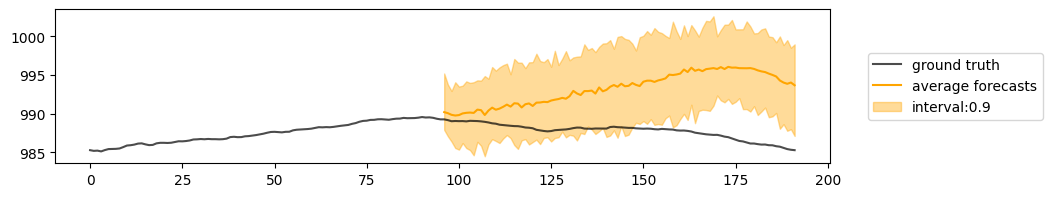

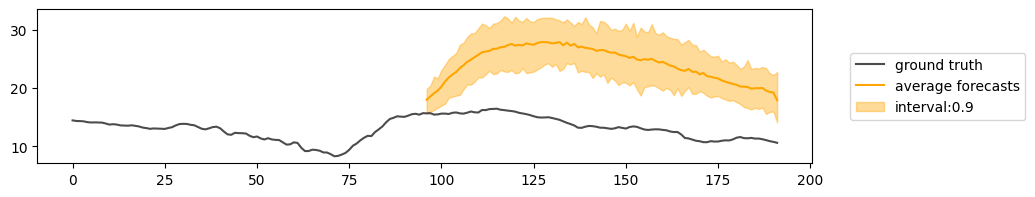

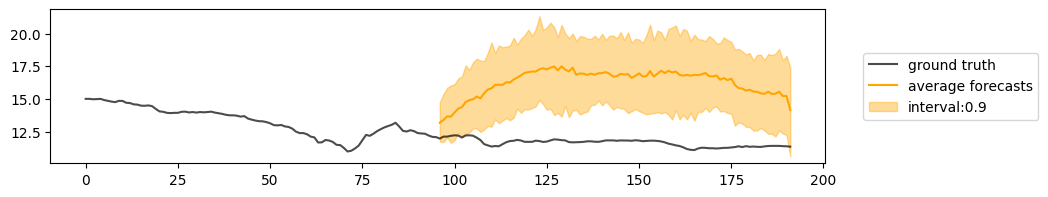

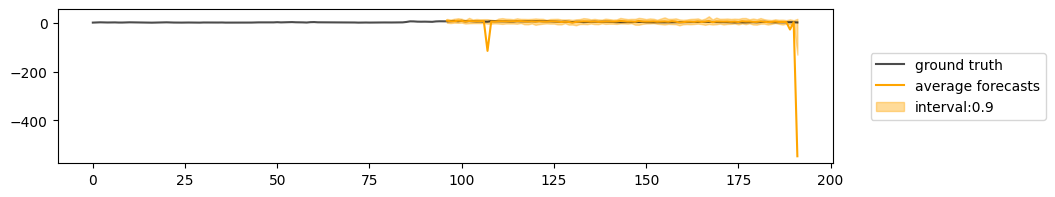

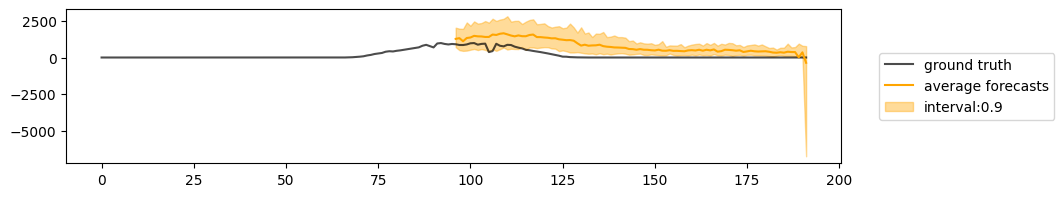

15


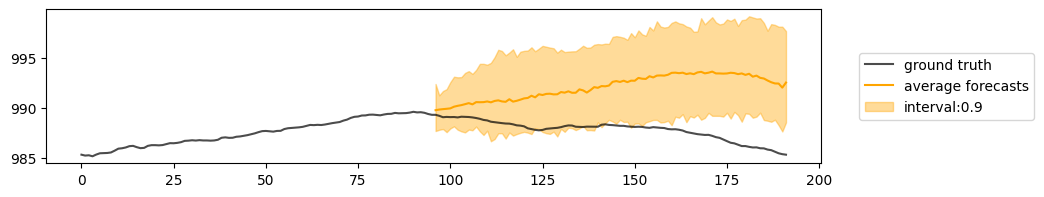

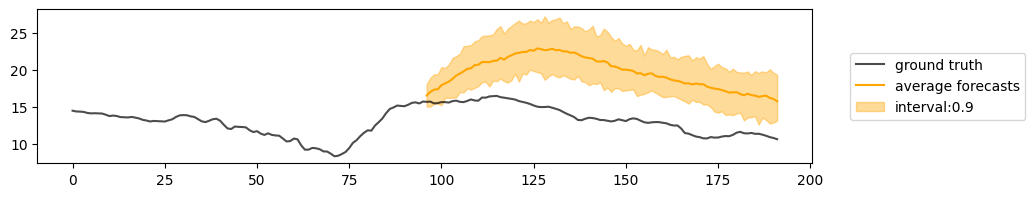

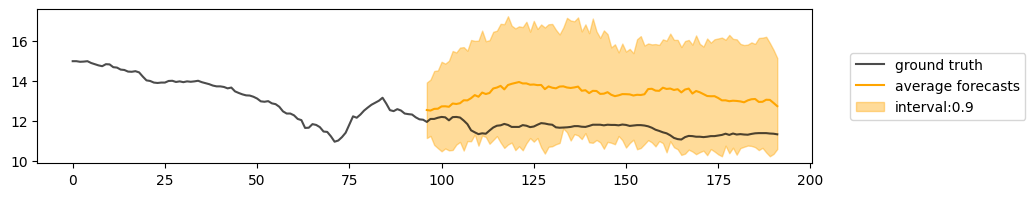

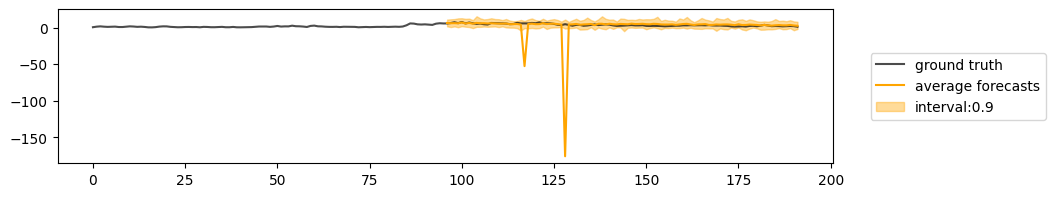

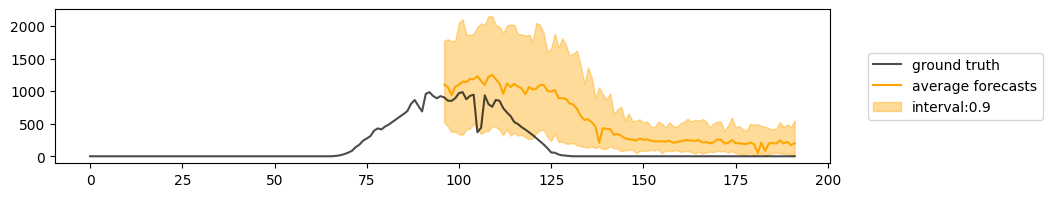

20


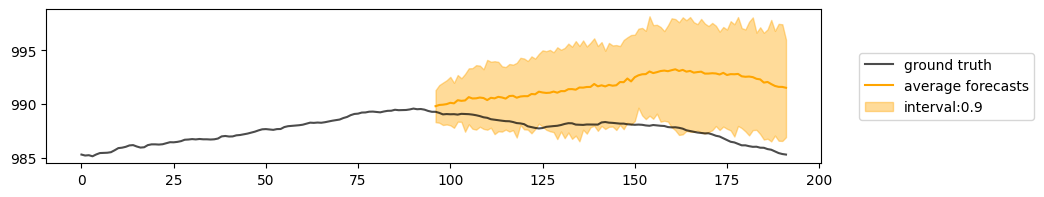

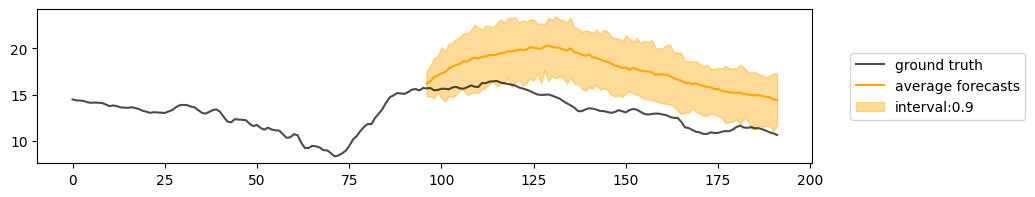

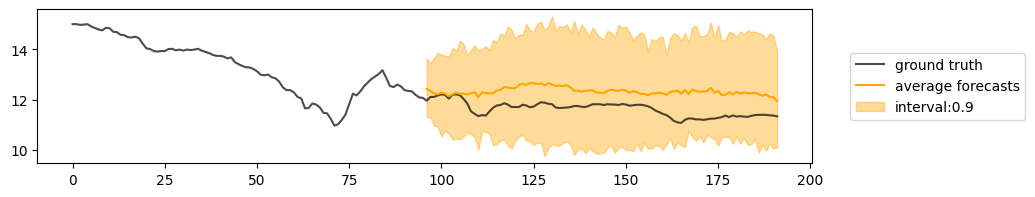

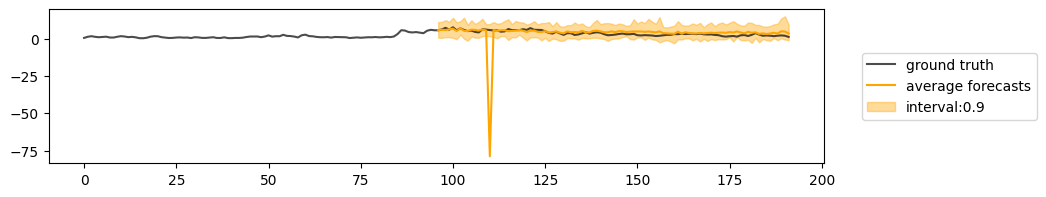

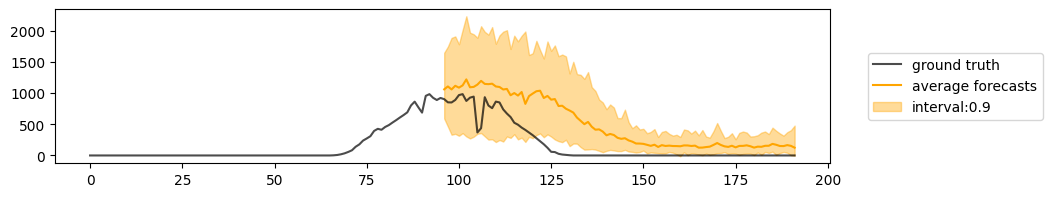

30


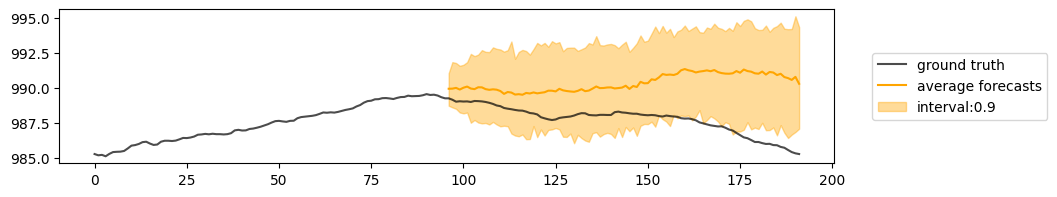

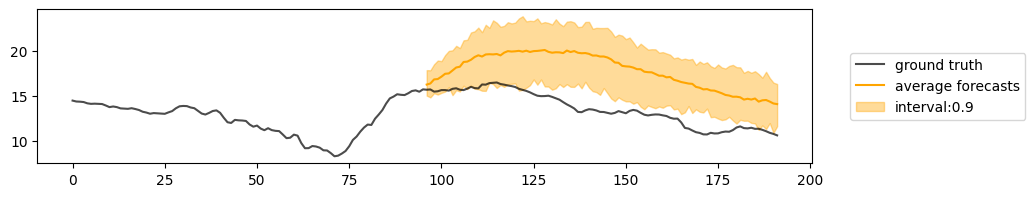

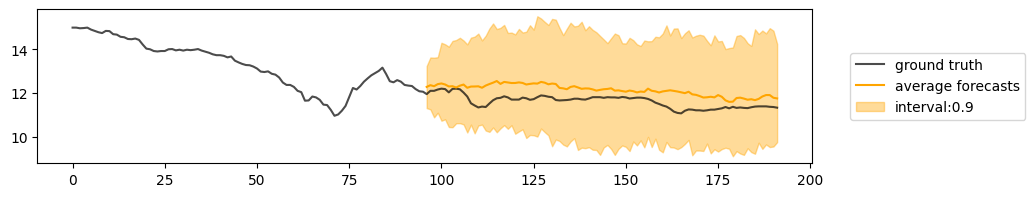

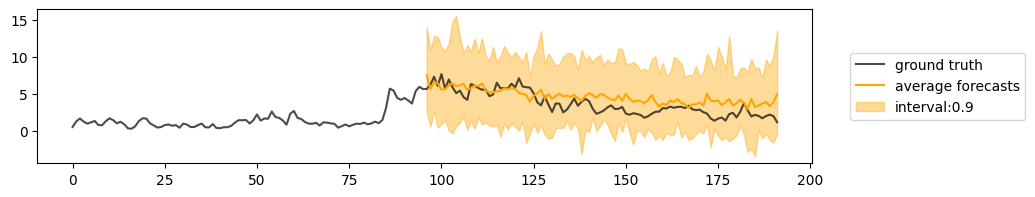

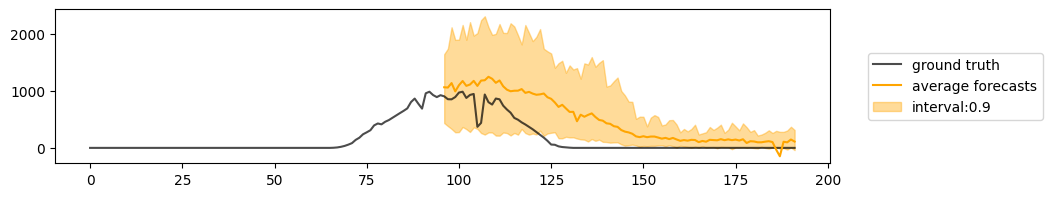

50


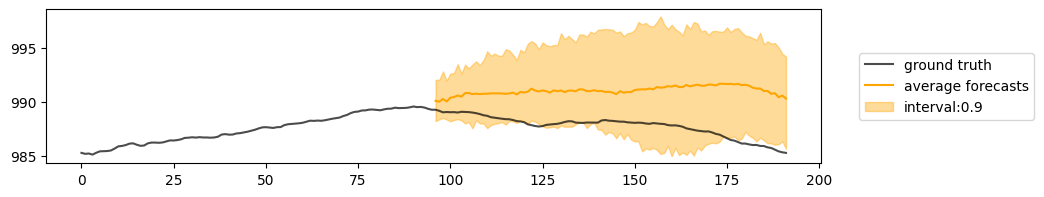

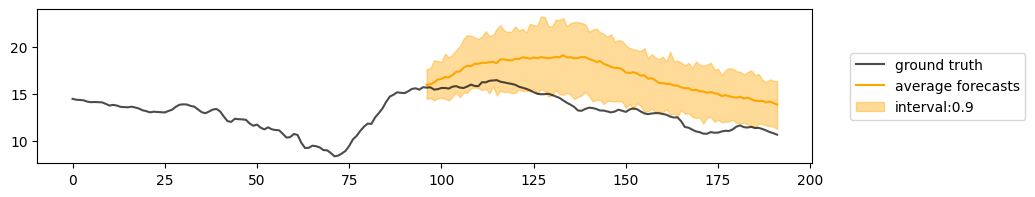

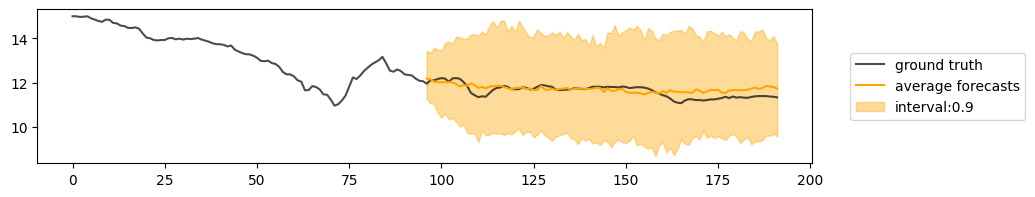

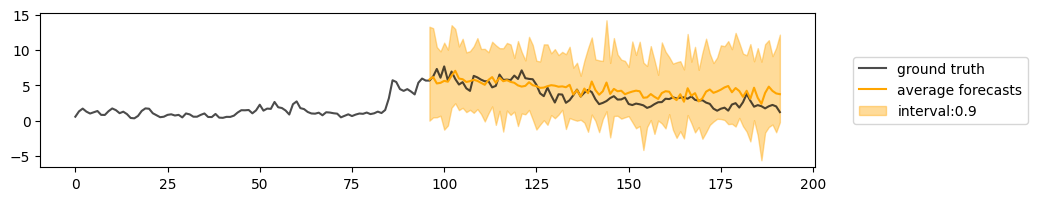

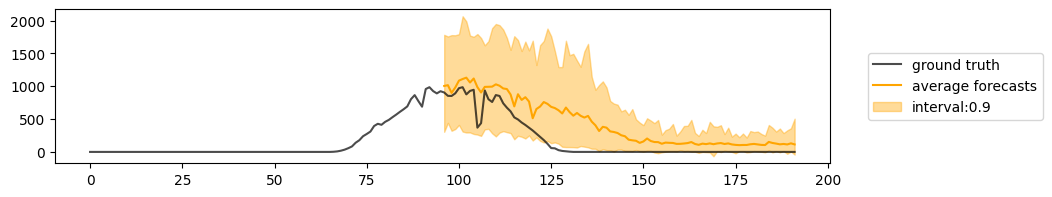

100


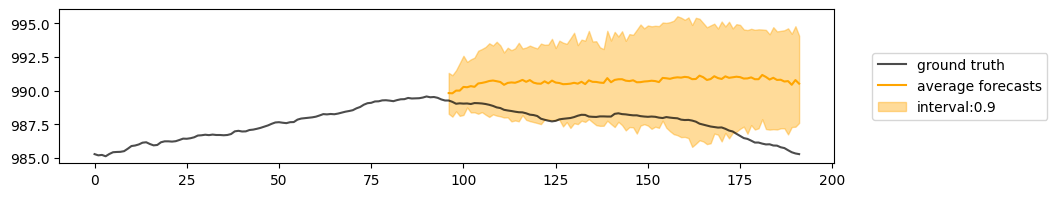

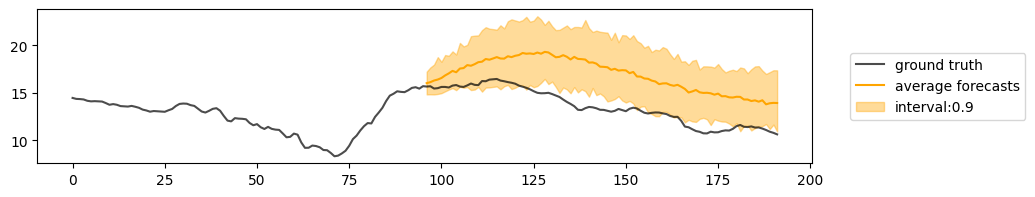

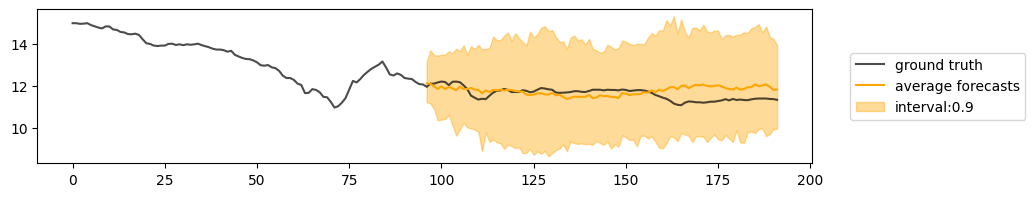

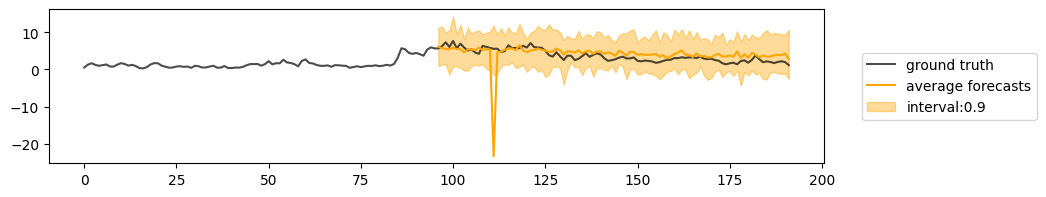

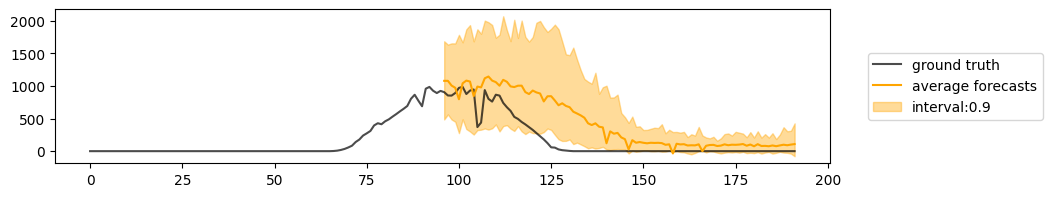

In [ ]:
for num_steps in steps:
    print(num_steps)
    model.forecaster.solver_num_steps = num_steps
    forecast_and_visualize(batch, model, num_chan=[0, 1, 6, 11, 18], num_samples=50, batch_idx=7, context_length=96, prediction_length=96)
    plt.show()

### DDIM, linear

In [ ]:
model.forecaster.solver_schedule = 'linear'

10


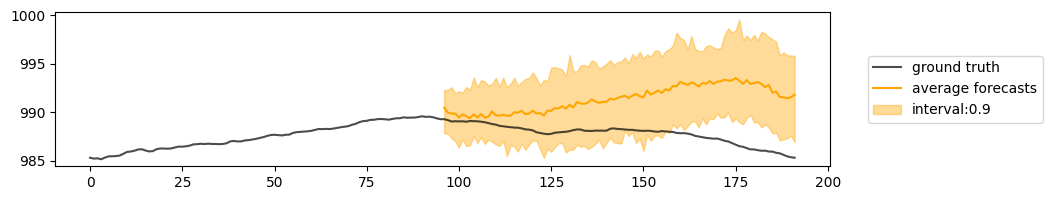

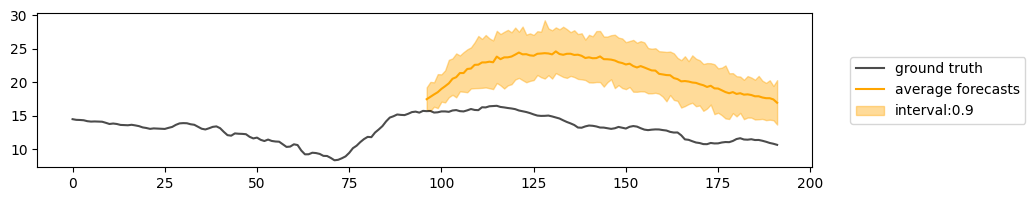

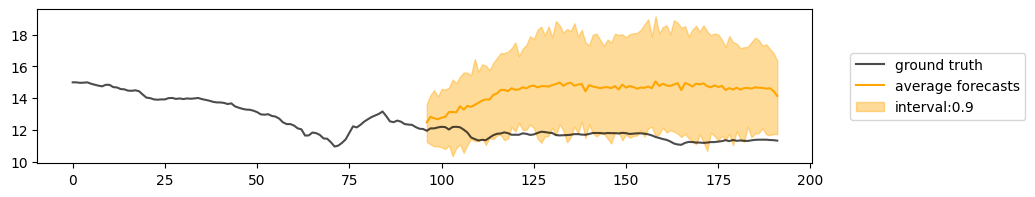

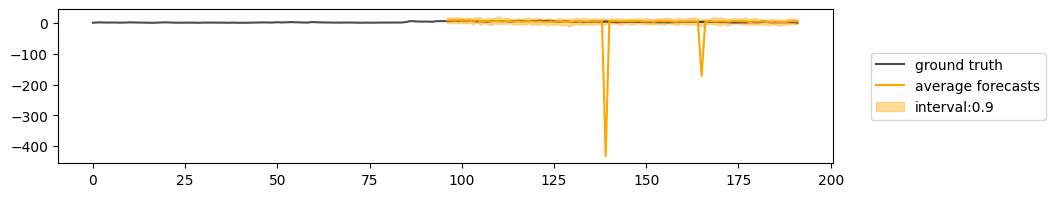

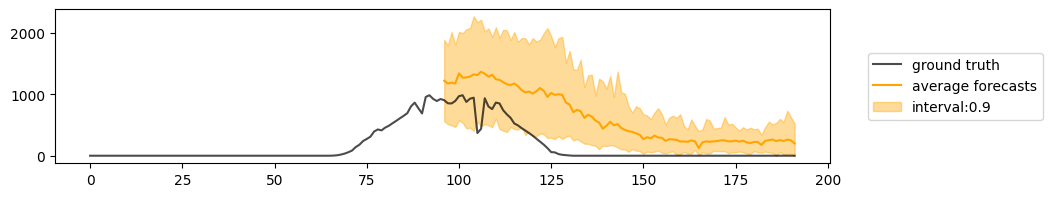

15


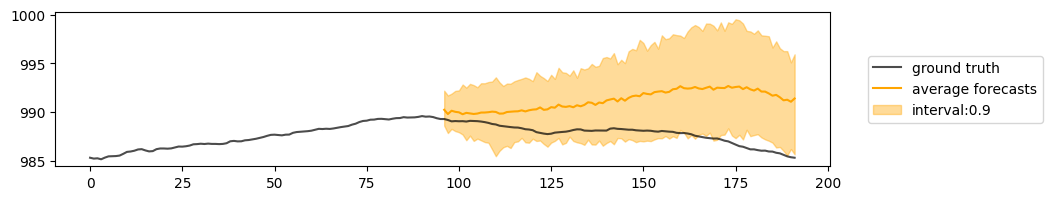

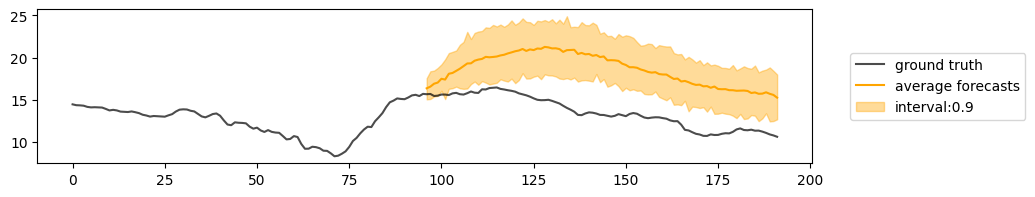

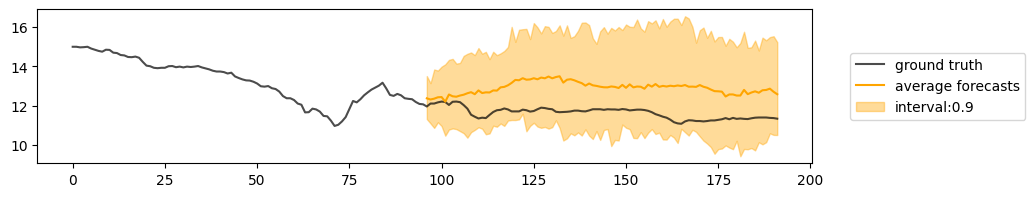

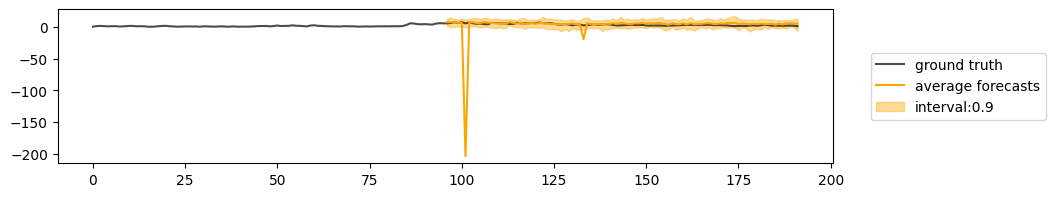

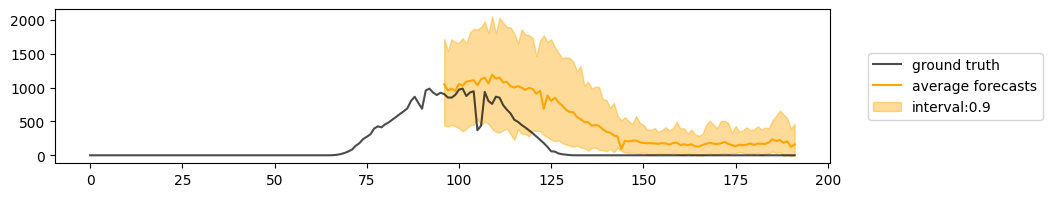

20


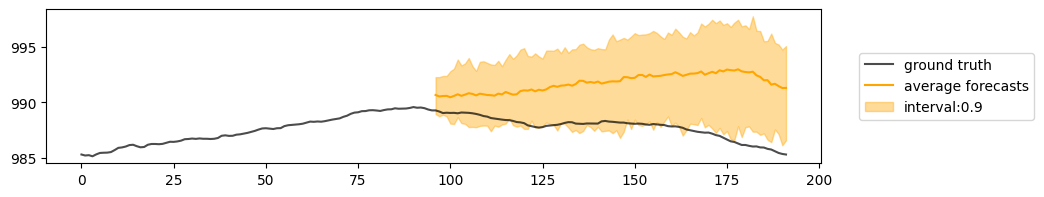

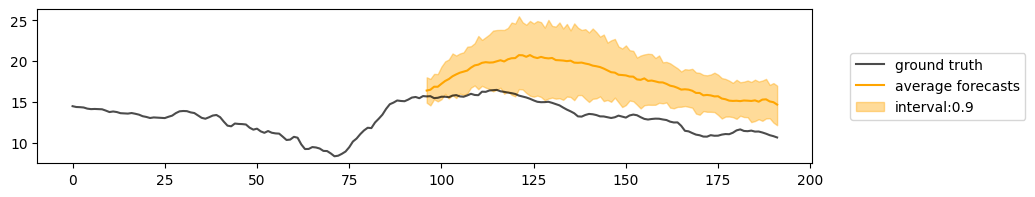

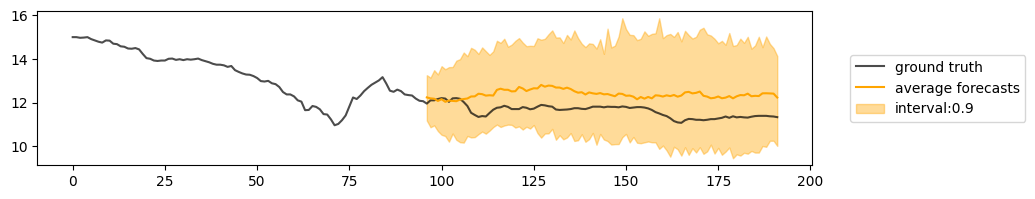

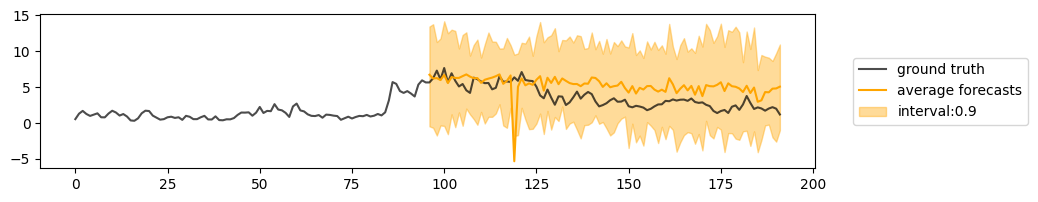

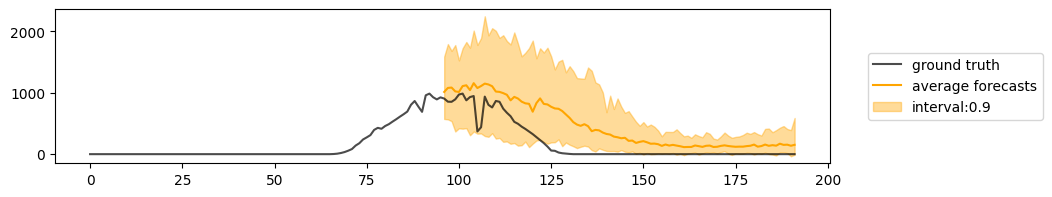

30


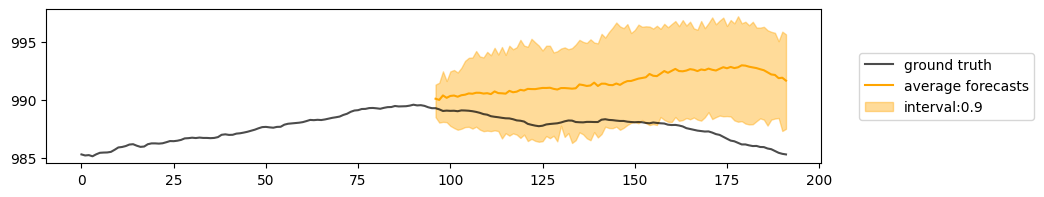

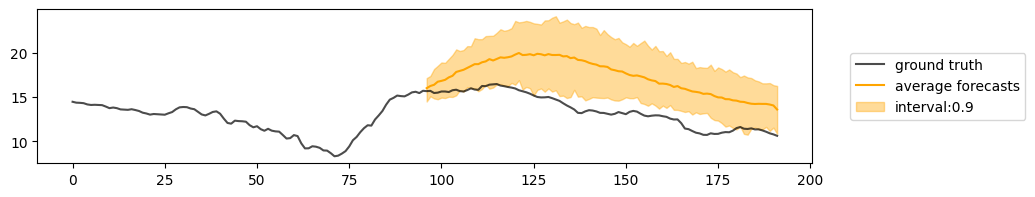

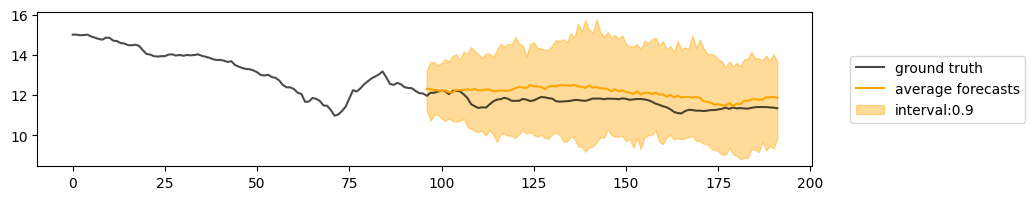

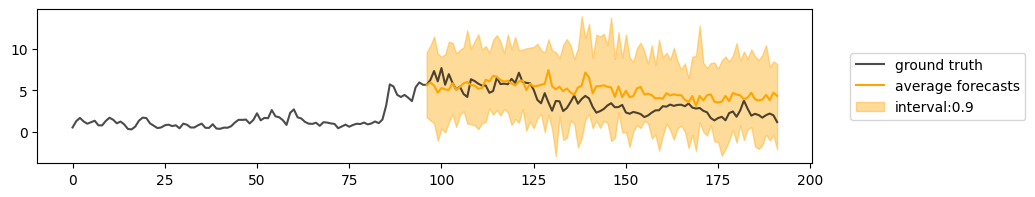

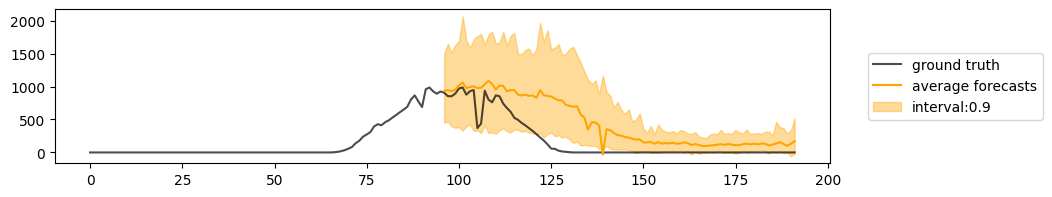

50


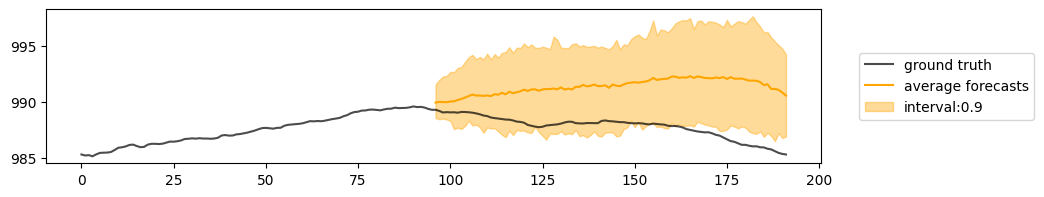

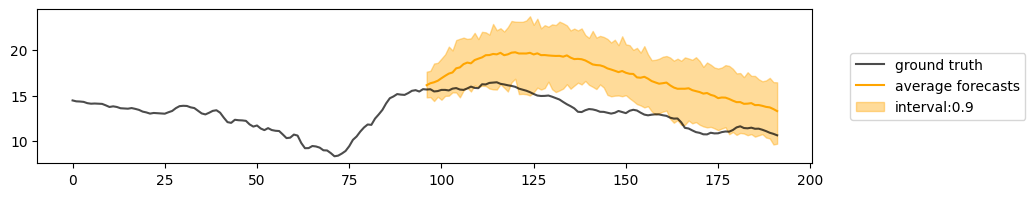

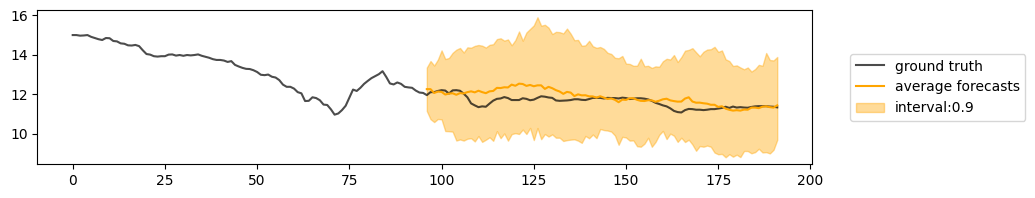

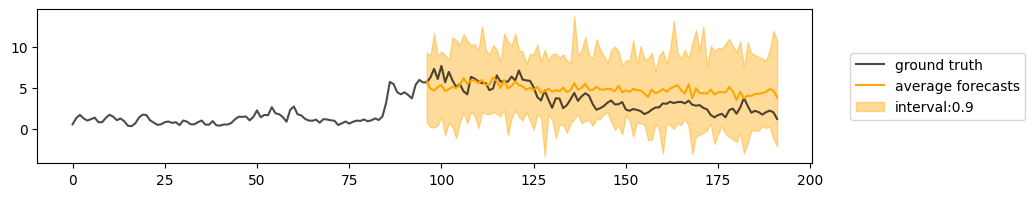

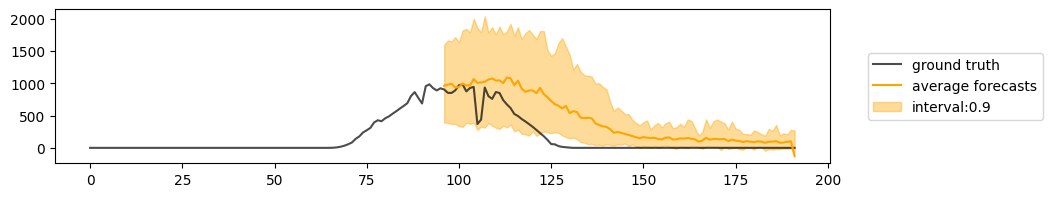

100


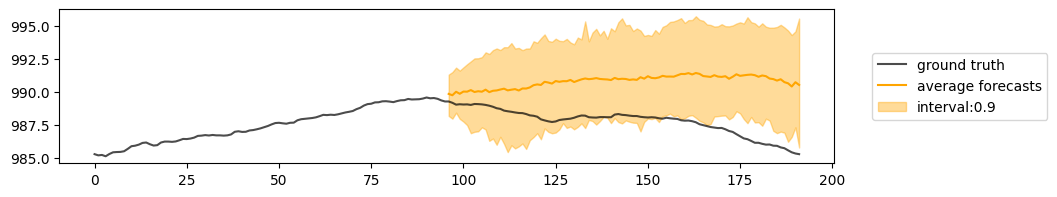

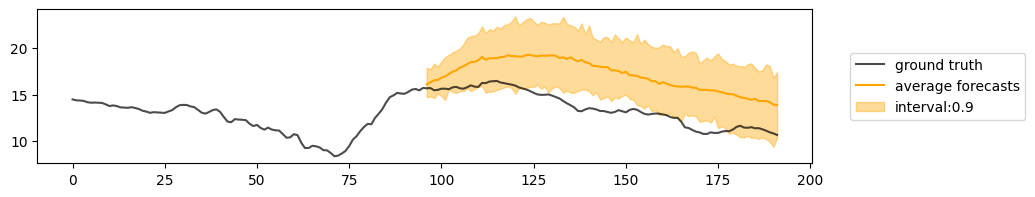

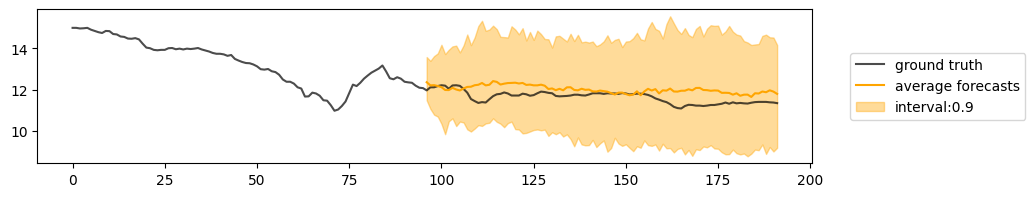

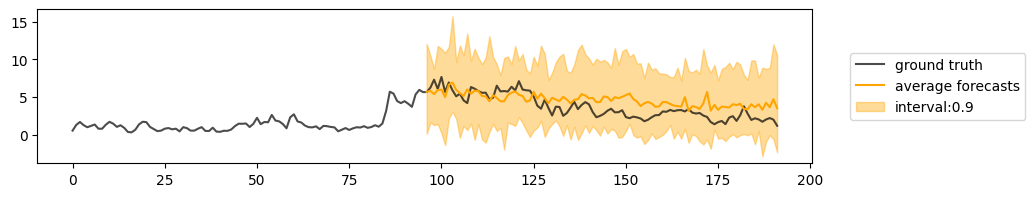

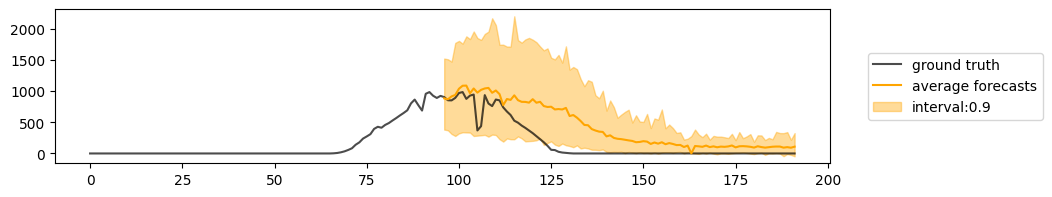

In [ ]:
model.forecaster.solver_schedule = 'linear'

for num_steps in steps:
    print(num_steps)
    model.forecaster.solver_num_steps = num_steps
    forecast_and_visualize(batch, model, num_chan=[0, 1, 6, 11, 18], num_samples=50, batch_idx=7, context_length=96, prediction_length=96)
    plt.show()

In [ ]:
ddim_linear_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=steps)

  0%|          | 0/6 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:32<02:44, 32.87s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.1605985015630722
    96_test_CRPS-Sum        0.1045762449502945
      96_test_MASE           50.4346809387207
       96_test_MSE           11316.9404296875
     96_test_MSE-Sum             484747.75
       96_test_ND           0.2043285071849823
     96_test_ND-Sum         0.13482941687107086
      96_test_NRMSE         0.6026731729507446
    96_test_NRMSE-Sum       0.18378998339176178
   96_test_weighted_ND      0.2043285071849823
 96_test_weighted_ND-Sum    0.13482941687107086
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [01:07<02:14, 33.64s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.1307252198457718
    96_test_CRPS-Sum        0.08512839674949646
      96_test_MASE           38.85708999633789
       96_test_MSE           7831.80419921875
     96_test_MSE-Sum            345611.8125
       96_test_ND           0.16709105670452118
     96_test_ND-Sum         0.11074584722518921
      96_test_NRMSE         0.4972206950187683
    96_test_NRMSE-Sum       0.1543882042169571
   96_test_weighted_ND      0.16709105670452118
 96_test_weighted_ND-Sum    0.11074584722518921
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [01:40<01:41, 33.71s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.12151772528886795
    96_test_CRPS-Sum        0.07829562574625015
      96_test_MASE           35.84914016723633
       96_test_MSE           7108.96923828125
     96_test_MSE-Sum             313264.75
       96_test_ND           0.15508347749710083
     96_test_ND-Sum         0.10202115774154663
      96_test_NRMSE         0.4709254205226898
    96_test_NRMSE-Sum       0.1459801346063614
   96_test_weighted_ND      0.15508347749710083
 96_test_weighted_ND-Sum    0.10202115774154663
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 67%|██████▋   | 4/6 [02:15<01:08, 34.06s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.11509440094232559
    96_test_CRPS-Sum        0.07395695149898529
      96_test_MASE           33.88272476196289
       96_test_MSE             6415.77734375
     96_test_MSE-Sum             284823.25
       96_test_ND           0.1474868357181549
     96_test_ND-Sum         0.09735629707574844
      96_test_NRMSE         0.4477265775203705
    96_test_NRMSE-Sum       0.13972781598567963
   96_test_weighted_ND      0.1474868357181549
 96_test_weighted_ND-Sum    0.09735629707574844
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [02:51<00:34, 34.89s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.11153744906187057
    96_test_CRPS-Sum        0.07115195691585541
      96_test_MASE           32.84330368041992
       96_test_MSE           6140.44970703125
     96_test_MSE-Sum            272757.5625
       96_test_ND            0.142868310213089
     96_test_ND-Sum         0.09381075203418732
      96_test_NRMSE         0.4373389184474945
    96_test_NRMSE-Sum       0.13655859231948853
   96_test_weighted_ND       0.142868310213089
 96_test_weighted_ND-Sum    0.09381075203418732
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

100%|██████████| 6/6 [03:32<00:00, 35.43s/it]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.10972489416599274
    96_test_CRPS-Sum        0.07027152925729752
      96_test_MASE          31.971277236938477
       96_test_MSE           6074.67919921875
     96_test_MSE-Sum             270522.0
       96_test_ND           0.14103765785694122
     96_test_ND-Sum         0.09261934459209442
      96_test_NRMSE         0.43390345573425293
    96_test_NRMSE-Sum       0.1356230229139328
   96_test_weighted_ND      0.14103765785694122
 96_test_weighted_ND-Sum    0.09261934459209442
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
with open("ddim_linear_metrics_sssd.pkl", "wb") as fp:
   pickle.dump(ddim_linear_metrics, fp)

### DPM-1

In [ ]:
model.forecaster.solver = 'dpm1'
model.forecaster.solver_schedule = 'linear'

for batch in test_dataloader:
    break

In [ ]:
dpm_time = []
for num_steps in tqdm(steps):
    model.forecaster.solver_num_steps = num_steps
    dpm_time.append(time_for_forecast(batch, model, n_repeats=1))
dpm_time

100%|██████████| 6/6 [00:04<00:00,  1.20it/s]


[0.4773733615875244,
 0.3125169277191162,
 0.3932466506958008,
 0.6005582809448242,
 1.0014410018920898,
 2.202665328979492]

In [ ]:
dpm1_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=steps)

  0%|          | 0/6 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:32<02:44, 32.93s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.16150060296058655
    96_test_CRPS-Sum        0.1053534746170044
      96_test_MASE           50.51106643676758
       96_test_MSE           11471.8330078125
     96_test_MSE-Sum           493960.46875
       96_test_ND           0.20550768077373505
     96_test_ND-Sum         0.13589109480381012
      96_test_NRMSE         0.6062989830970764
    96_test_NRMSE-Sum       0.18557365238666534
   96_test_weighted_ND      0.20550768077373505
 96_test_weighted_ND-Sum    0.13589109480381012
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [01:06<02:12, 33.12s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.13100452721118927
    96_test_CRPS-Sum        0.08552214503288269
      96_test_MASE           38.95384979248047
       96_test_MSE             7817.26171875
     96_test_MSE-Sum            346506.6875
       96_test_ND           0.16725587844848633
     96_test_ND-Sum         0.11074469238519669
      96_test_NRMSE         0.4973454475402832
    96_test_NRMSE-Sum       0.1546897292137146
   96_test_weighted_ND      0.16725587844848633
 96_test_weighted_ND-Sum    0.11074469238519669
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [01:40<01:40, 33.47s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.1215473935008049
    96_test_CRPS-Sum        0.07844081521034241
      96_test_MASE          35.855491638183594
       96_test_MSE             7100.49609375
     96_test_MSE-Sum            314151.125
       96_test_ND           0.15547224879264832
     96_test_ND-Sum         0.1026514545083046
      96_test_NRMSE         0.4717290997505188
    96_test_NRMSE-Sum       0.14657485485076904
   96_test_weighted_ND      0.15547224879264832
 96_test_weighted_ND-Sum    0.1026514545083046
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 67%|██████▋   | 4/6 [02:14<01:07, 34.00s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.11500758677721024
    96_test_CRPS-Sum        0.07391182333230972
      96_test_MASE           33.92524337768555
       96_test_MSE              6383.140625
     96_test_MSE-Sum             283311.5
       96_test_ND           0.14739730954170227
     96_test_ND-Sum         0.09717787057161331
      96_test_NRMSE          0.448036253452301
    96_test_NRMSE-Sum       0.13967472314834595
   96_test_weighted_ND      0.14739730954170227
 96_test_weighted_ND-Sum    0.09717787057161331
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [02:51<00:34, 34.88s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.11262869834899902
    96_test_CRPS-Sum        0.07219207286834717
      96_test_MASE           32.75251388549805
       96_test_MSE           6321.08837890625
     96_test_MSE-Sum           283459.78125
       96_test_ND           0.14418350160121918
     96_test_ND-Sum         0.09492594748735428
      96_test_NRMSE         0.44294020533561707
    96_test_NRMSE-Sum       0.13866446912288666
   96_test_weighted_ND      0.14418350160121918
 96_test_weighted_ND-Sum    0.09492594748735428
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

100%|██████████| 6/6 [03:32<00:00, 35.43s/it]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.10926171392202377
    96_test_CRPS-Sum        0.07009712606668472
      96_test_MASE          31.842483520507812
       96_test_MSE           6038.35107421875
     96_test_MSE-Sum            270222.5625
       96_test_ND           0.1403655856847763
     96_test_ND-Sum          0.092460498213768
      96_test_NRMSE         0.43333005905151367
    96_test_NRMSE-Sum       0.13563978672027588
   96_test_weighted_ND      0.1403655856847763
 96_test_weighted_ND-Sum     0.092460498213768
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
with open("dpm1_metrics_sssd.pkl", "wb") as fp:
   pickle.dump(dpm1_metrics, fp)

10


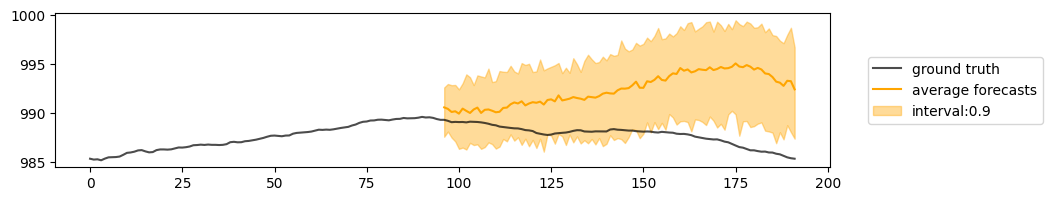

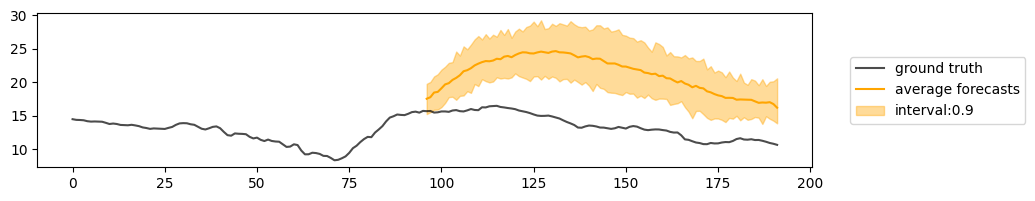

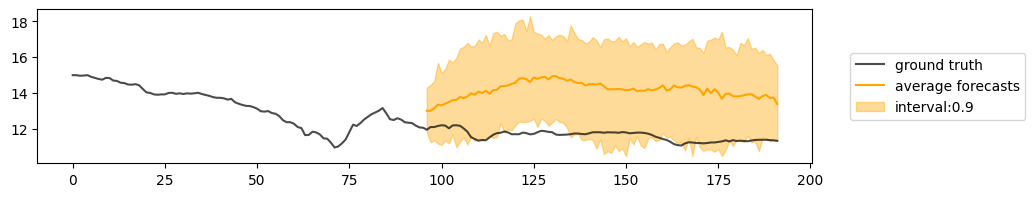

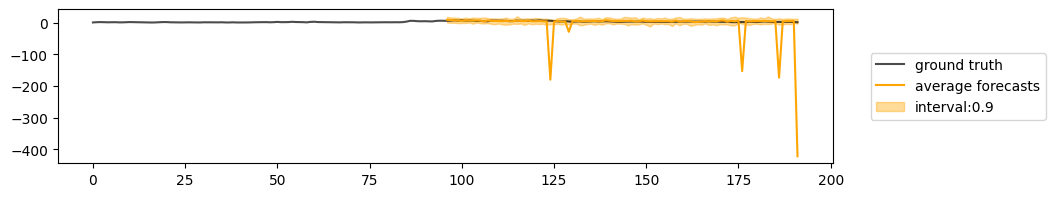

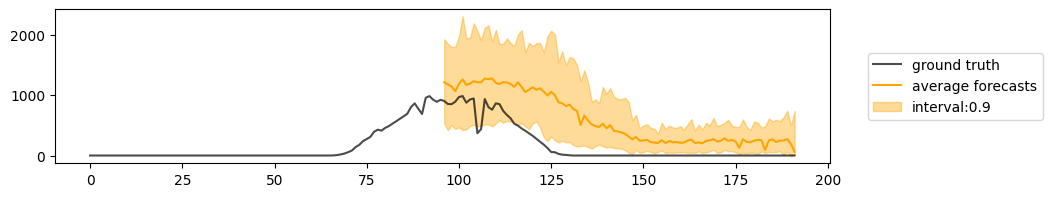

15


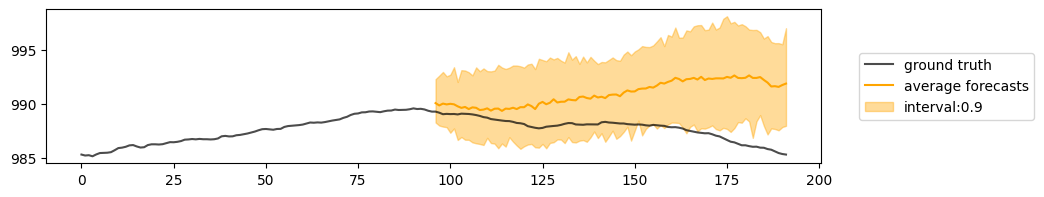

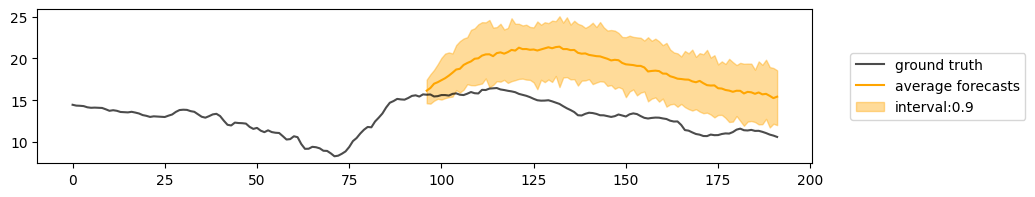

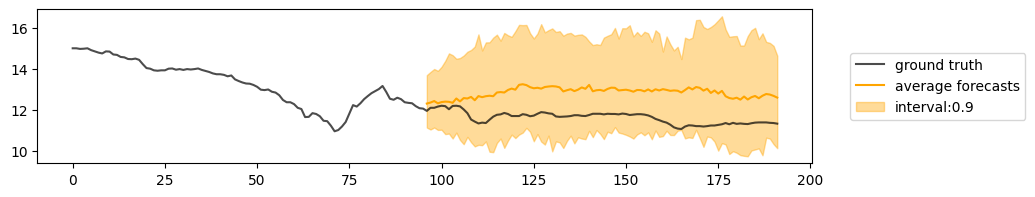

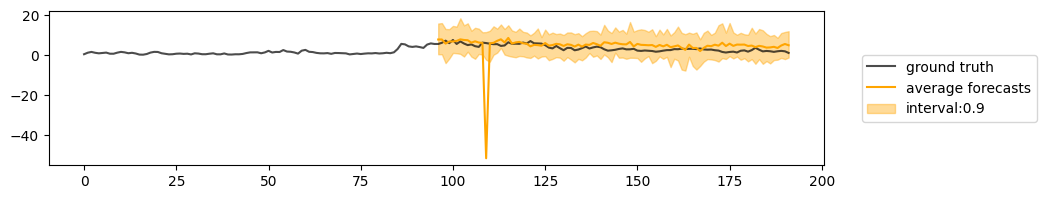

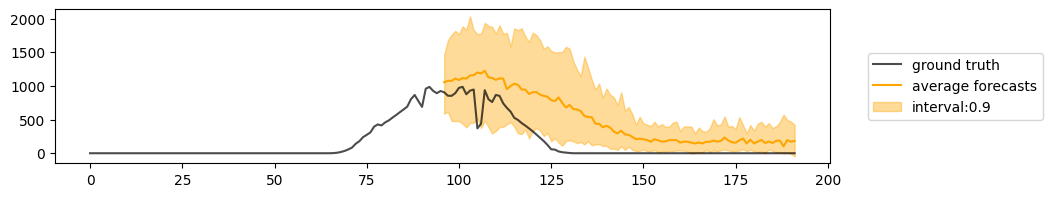

20


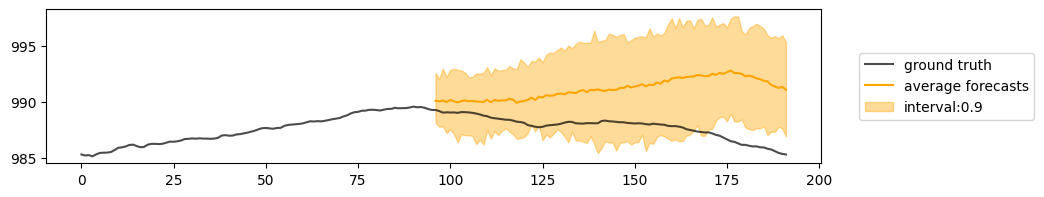

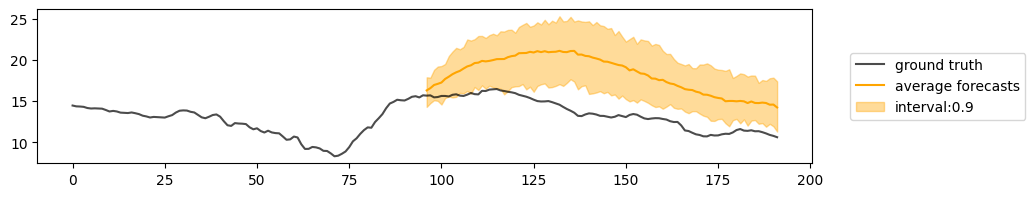

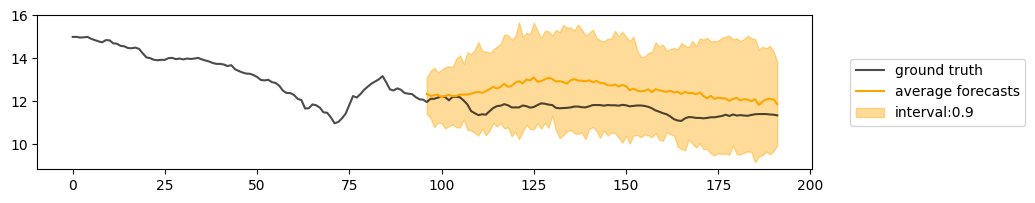

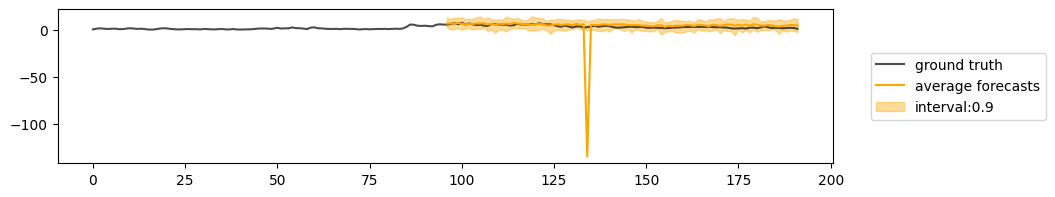

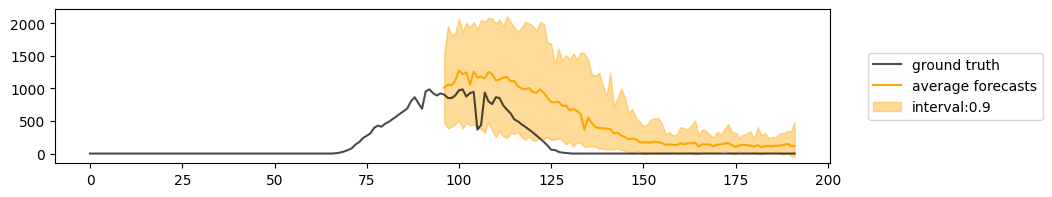

30


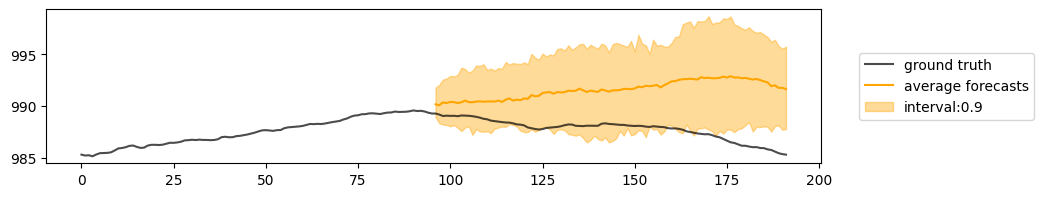

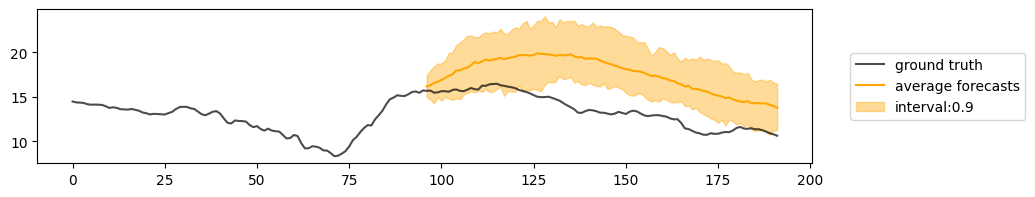

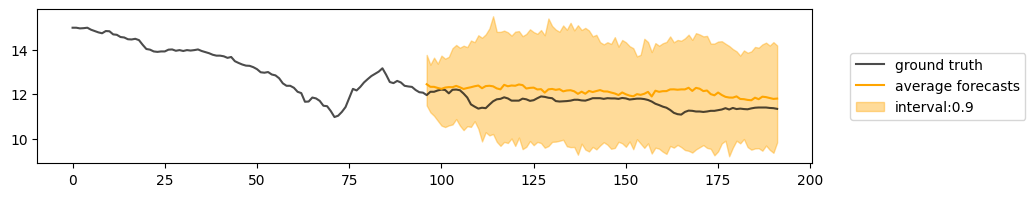

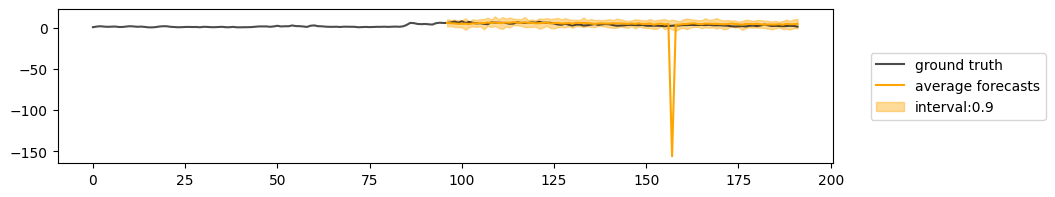

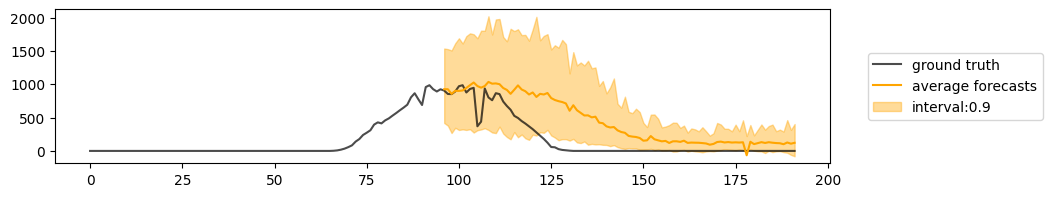

50


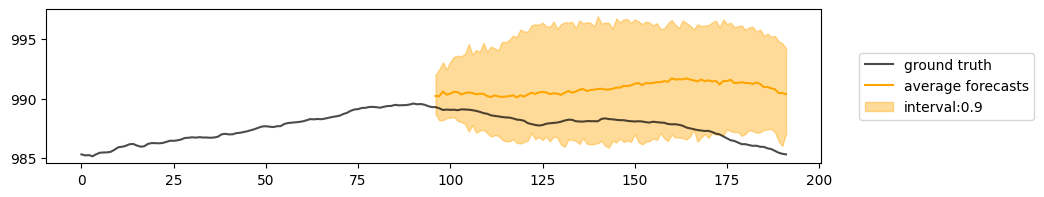

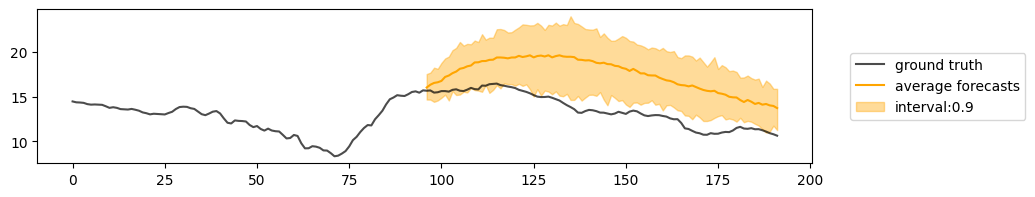

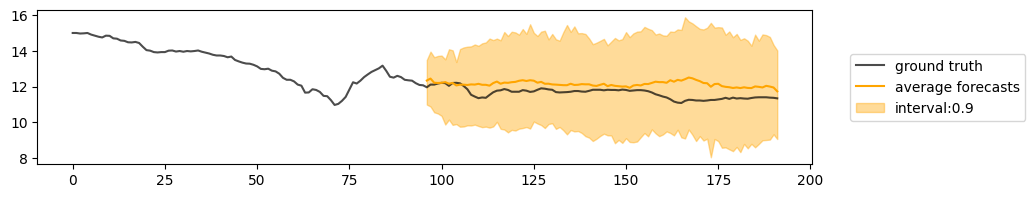

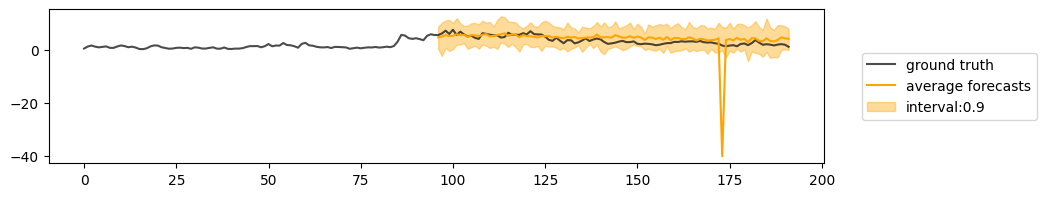

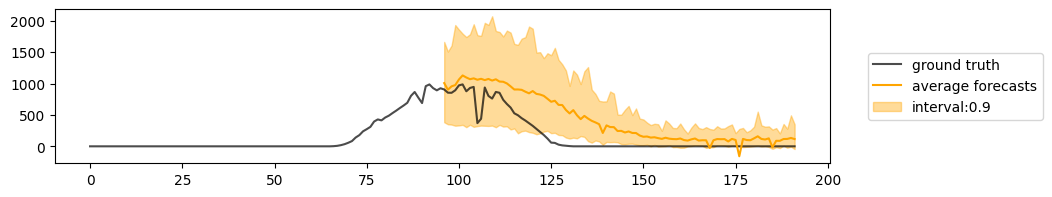

100


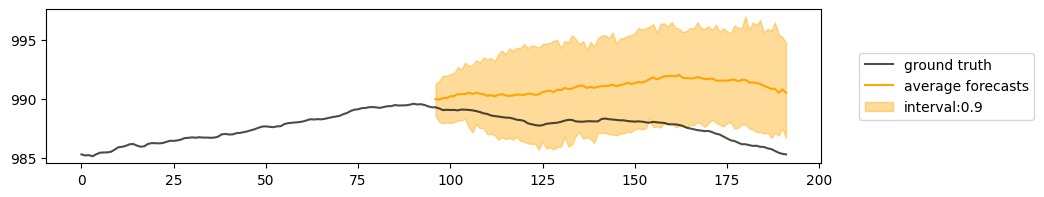

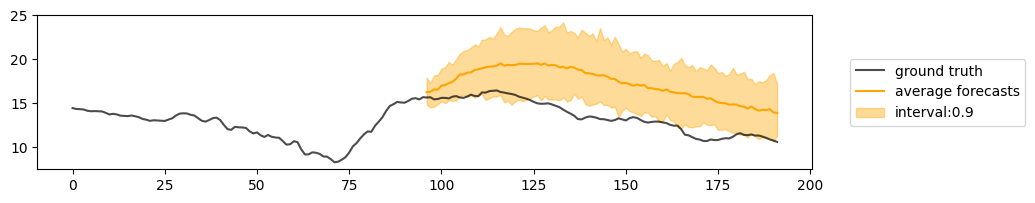

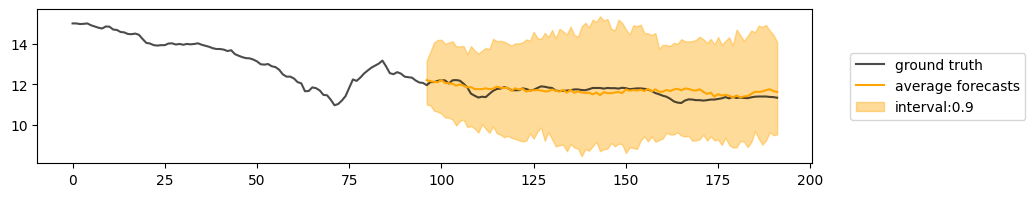

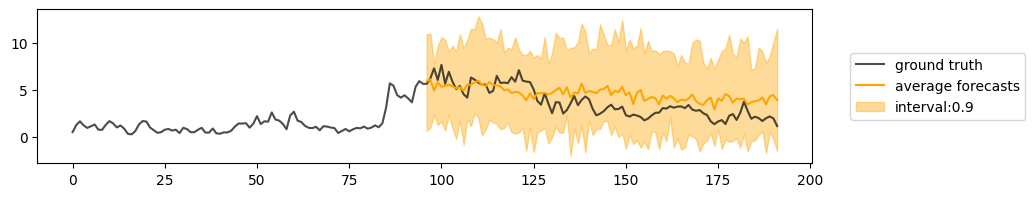

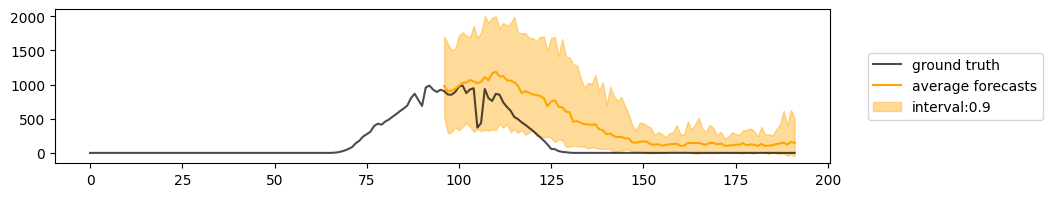

In [ ]:
for num_steps in steps:
    print(num_steps)
    model.forecaster.solver_num_steps = num_steps
    forecast_and_visualize(batch, model, num_chan=[0, 1, 6, 11, 18], num_samples=50, batch_idx=7, context_length=96, prediction_length=96)
    plt.show()

### DPM-Solver-2

In [ ]:
model.forecaster.solver = 'dpm2'
model.forecaster.solver_schedule = 'linear'
model.scaler = data_manager.scaler
model.forecaster.solver_num_steps = 15

steps = [10, 15, 20, 30, 50, 100]
for batch in test_dataloader:
    break

In [ ]:
dpm_time = []
for num_steps in tqdm(steps):
    model.forecaster.solver_num_steps = num_steps // 2
    dpm_time.append(time_for_forecast(batch, model, n_repeats=1))
dpm_time

100%|██████████| 6/6 [00:05<00:00,  1.03it/s]


[0.17548179626464844,
 0.2538604736328125,
 0.37094545364379883,
 0.5764005184173584,
 1.1431009769439697,
 3.2797651290893555]

In [ ]:
dpm2_metrics = check_metrics_for_samplers(test_dataloader, model, trainer, steps=[step // 2 for step in steps])

  0%|          | 0/6 [00:00<?, ?it/s]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:33<02:46, 33.34s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS           3841.62158203125
    96_test_CRPS-Sum            3475.390625
      96_test_MASE              631058.375
       96_test_MSE            6583815241728.0
     96_test_MSE-Sum         233573139349504.0
       96_test_ND            4995.83056640625
     96_test_ND-Sum          4277.47119140625
      96_test_NRMSE          15363.3369140625
    96_test_NRMSE-Sum         4359.775390625
   96_test_weighted_ND       4995.83056640625
 96_test_weighted_ND-Sum     4277.47119140625
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 33%|███▎      | 2/6 [01:07<02:14, 33.62s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          1.1527559757232666
    96_test_CRPS-Sum        0.9152019619941711
      96_test_MASE          286.61785888671875
       96_test_MSE              404255.5625
     96_test_MSE-Sum            18215108.0
       96_test_ND           1.5105576515197754
     96_test_ND-Sum         1.1331630945205688
      96_test_NRMSE         3.7949109077453613
    96_test_NRMSE-Sum       1.2035284042358398
   96_test_weighted_ND      1.5105576515197754
 96_test_weighted_ND-Sum    1.1331630945205688
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 50%|█████     | 3/6 [01:41<01:41, 33.97s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.14496514201164246
    96_test_CRPS-Sum        0.10134272277355194
      96_test_MASE          28.982919692993164
       96_test_MSE            11339.998046875
     96_test_MSE-Sum            581619.3125
       96_test_ND           0.1887972056865692
     96_test_ND-Sum         0.1357753723859787
      96_test_NRMSE         0.5820661187171936
    96_test_NRMSE-Sum       0.19677317142486572
   96_test_weighted_ND      0.1887972056865692
 96_test_weighted_ND-Sum    0.1357753723859787
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 67%|██████▋   | 4/6 [02:16<01:08, 34.34s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.09978972375392914
    96_test_CRPS-Sum        0.06650764495134354
      96_test_MASE           28.78474998474121
       96_test_MSE           5541.99853515625
     96_test_MSE-Sum            264779.1875
       96_test_ND           0.12880998849868774
     96_test_ND-Sum         0.08791220188140869
      96_test_NRMSE         0.40867432951927185
    96_test_NRMSE-Sum       0.13349030911922455
   96_test_weighted_ND      0.12880998849868774
 96_test_weighted_ND-Sum    0.08791220188140869
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

 83%|████████▎ | 5/6 [02:53<00:35, 35.20s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.1070966050028801
    96_test_CRPS-Sum        0.0703081414103508
      96_test_MASE          30.756927490234375
       96_test_MSE           6202.38720703125
     96_test_MSE-Sum             283326.0
       96_test_ND           0.13760320842266083
     96_test_ND-Sum         0.09234607964754105
      96_test_NRMSE          0.437284916639328
    96_test_NRMSE-Sum       0.13878300786018372
   96_test_weighted_ND      0.13760320842266083
 96_test_weighted_ND-Sum    0.09234607964754105
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

100%|██████████| 6/6 [03:33<00:00, 35.66s/it]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      96_test_CRPS          0.1084139347076416
    96_test_CRPS-Sum        0.06737791001796722
      96_test_MASE          30.845666885375977
       96_test_MSE            5428.6767578125
     96_test_MSE-Sum           244786.765625
       96_test_ND           0.13510024547576904
     96_test_ND-Sum         0.08748093247413635
      96_test_NRMSE         0.3921058475971222
    96_test_NRMSE-Sum       0.1215682327747345
   96_test_weighted_ND      0.13510024547576904
 96_test_weighted_ND-Sum    0.08748093247413635
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
import pickle
with open("dpm2_metrics_sssd.pkl", "wb") as fp:
   pickle.dump(dpm2_metrics, fp)

10


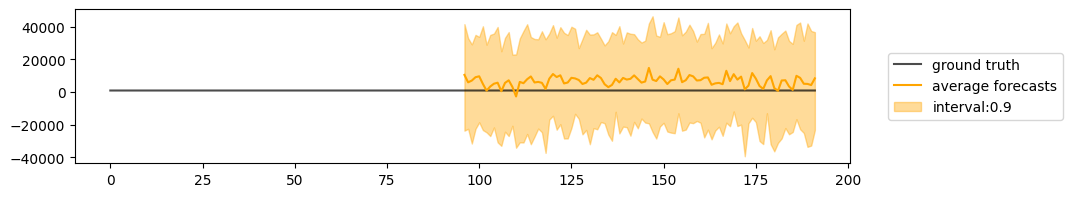

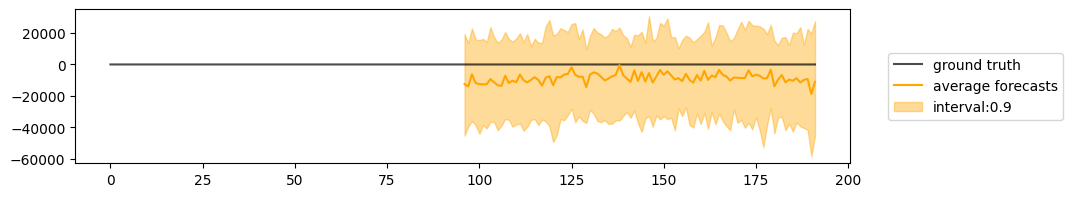

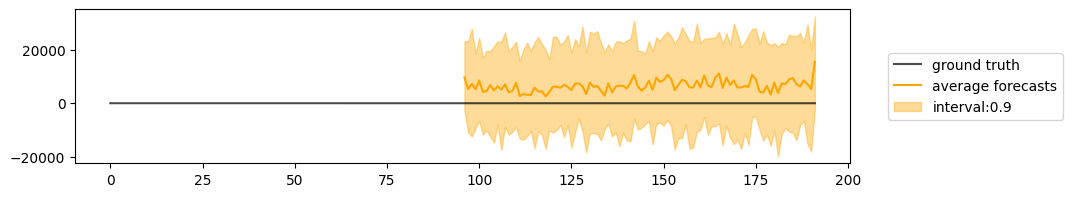

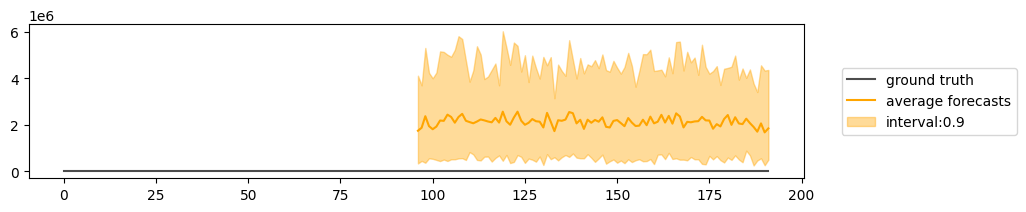

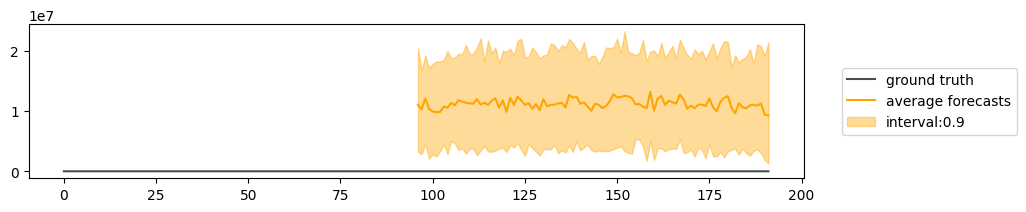

15


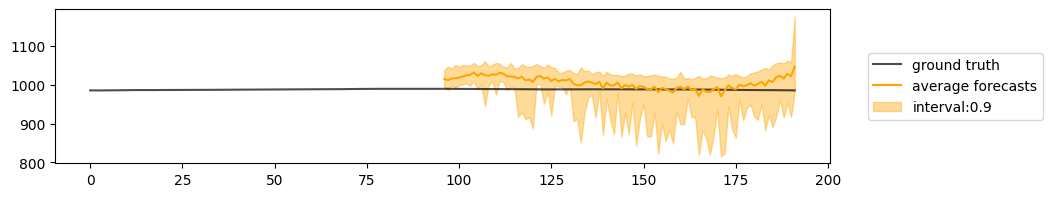

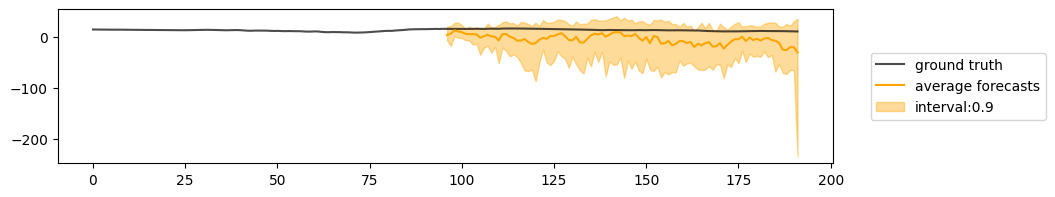

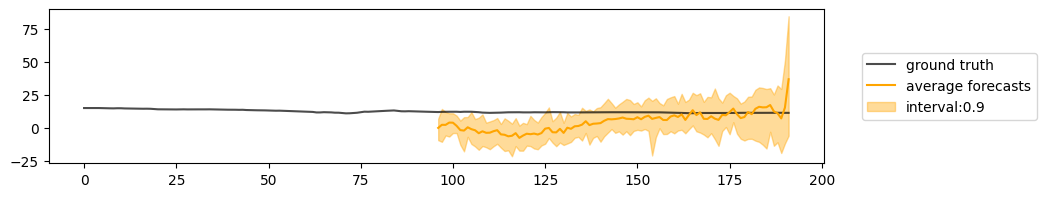

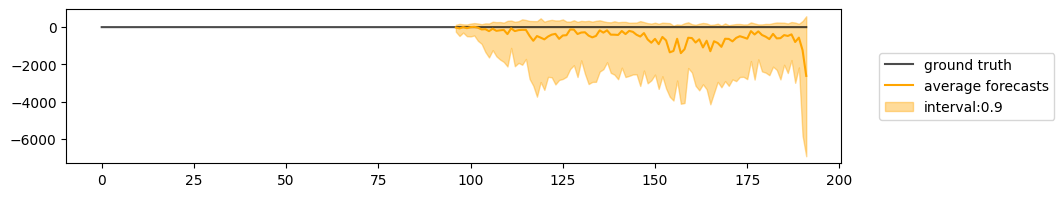

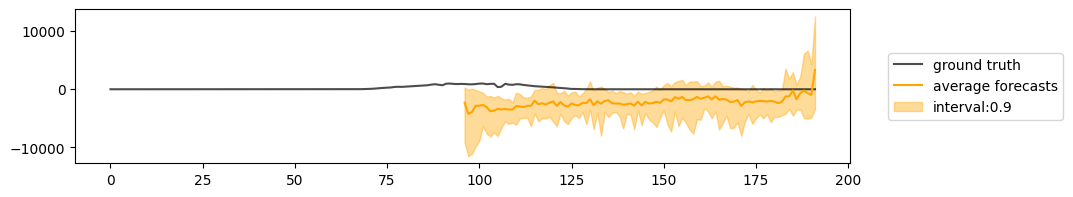

20


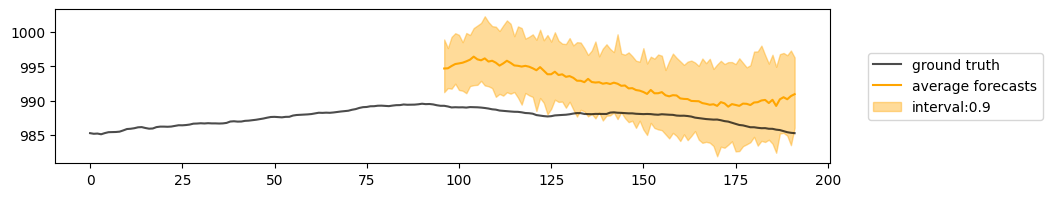

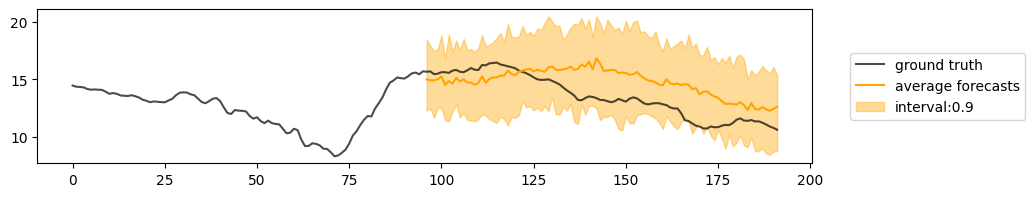

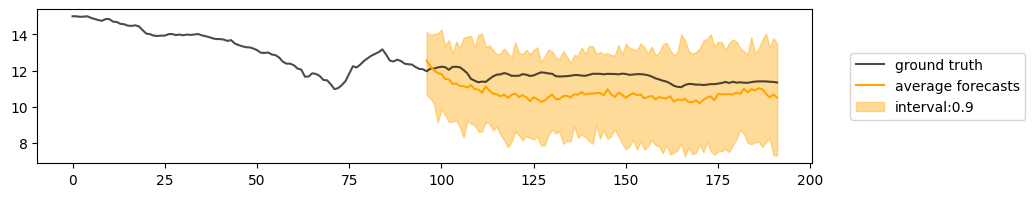

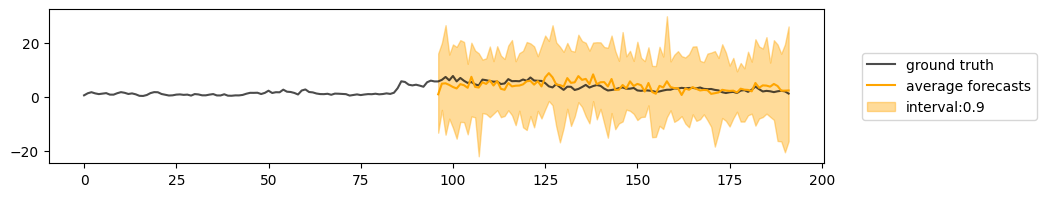

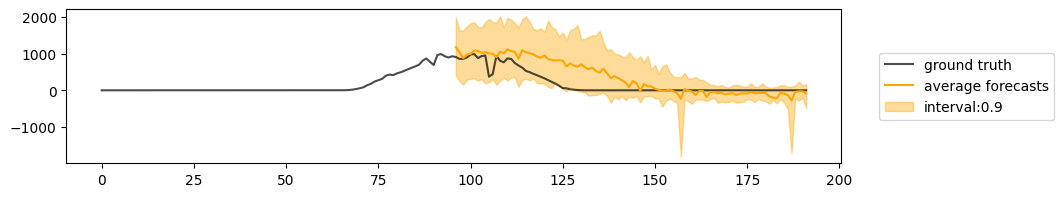

30


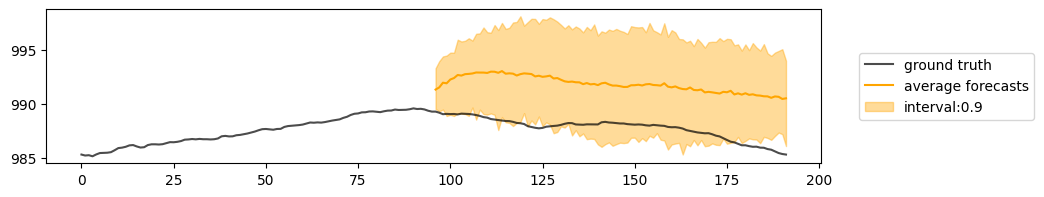

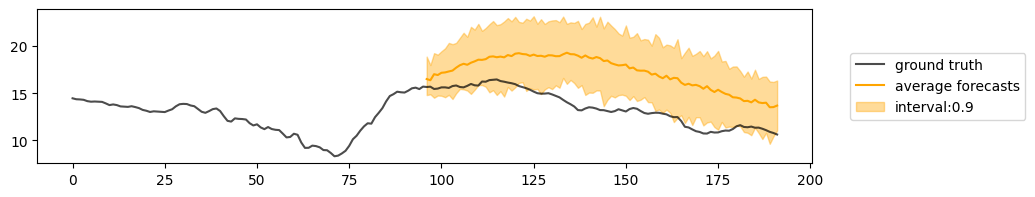

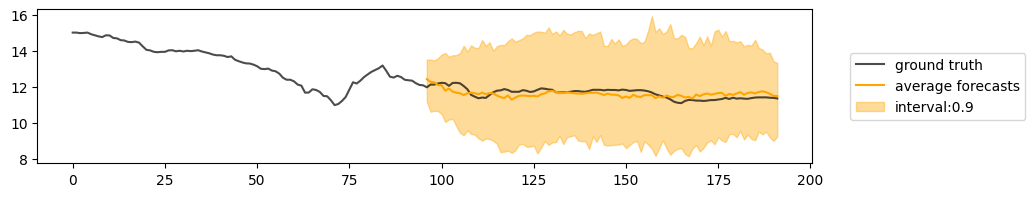

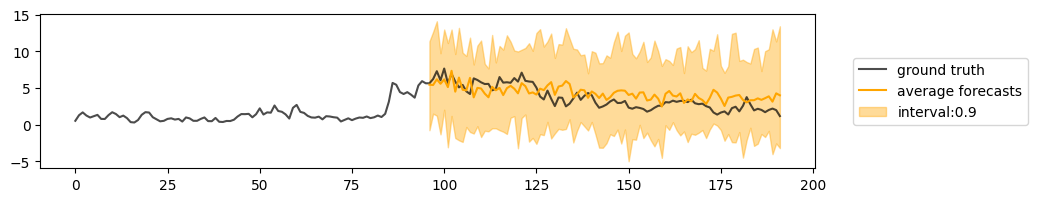

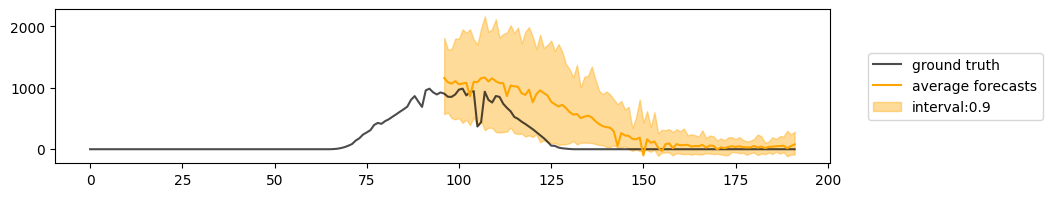

50


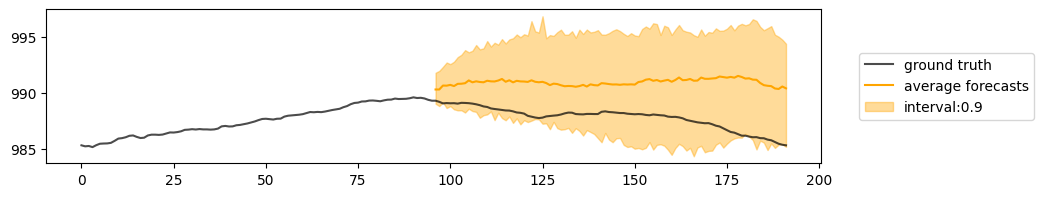

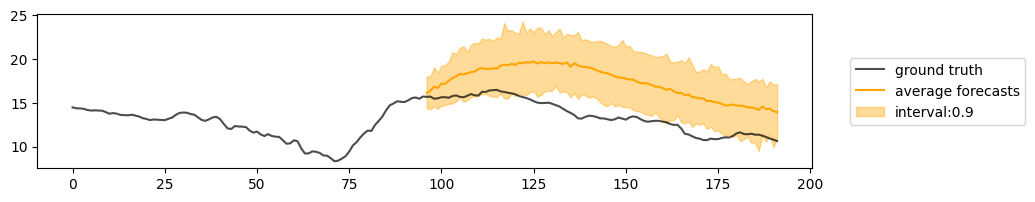

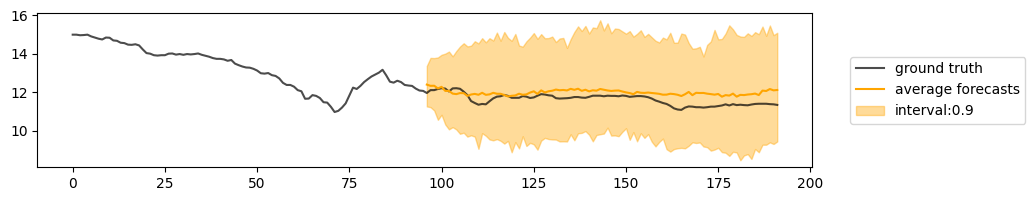

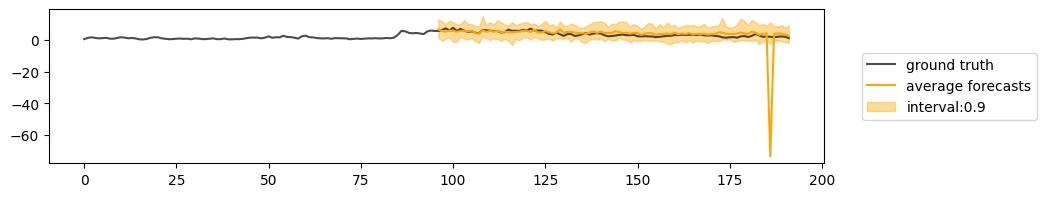

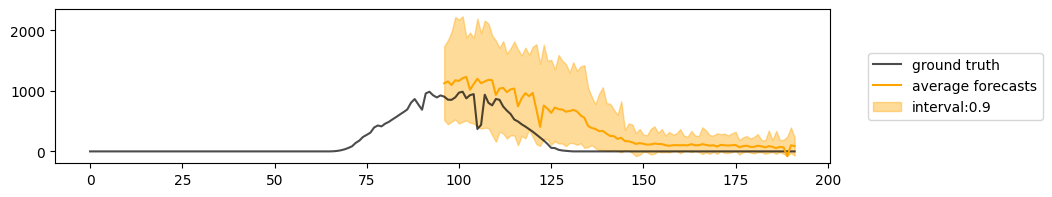

100


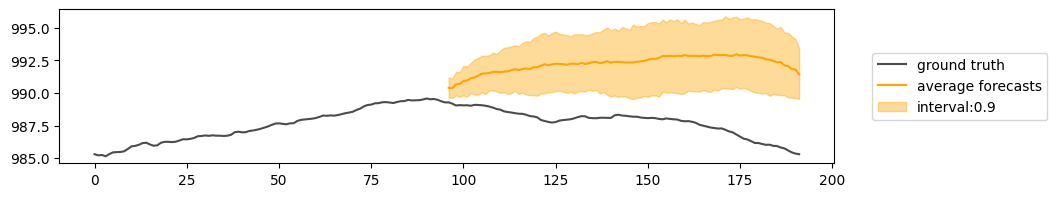

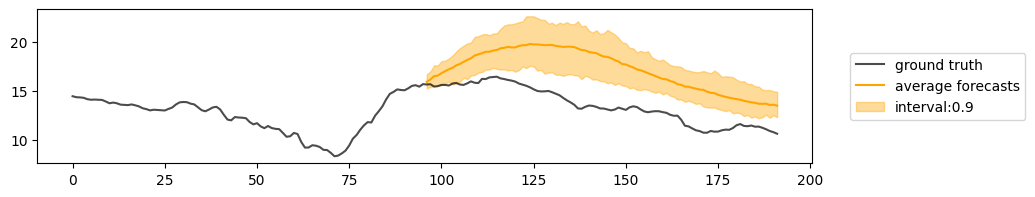

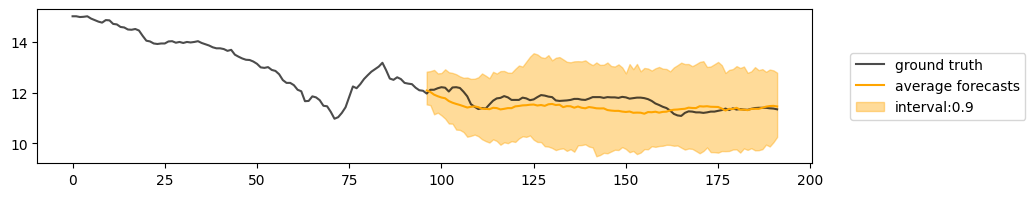

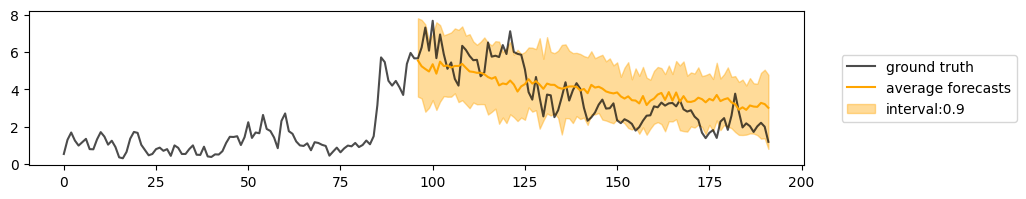

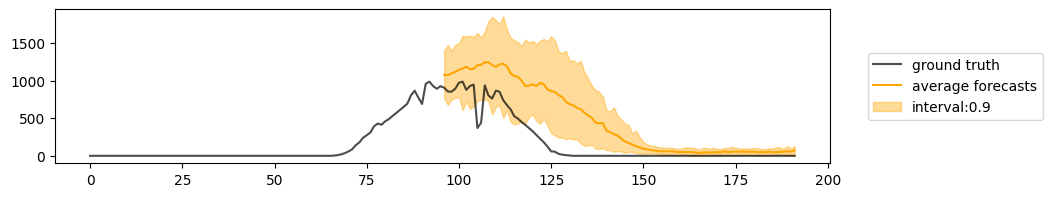

In [ ]:
for num_steps in steps:
    print(num_steps)
    model.forecaster.solver_num_steps = num_steps // 2
    forecast_and_visualize(batch, model, num_chan=[0, 1, 6, 11, 18], num_samples=50, batch_idx=7, context_length=96, prediction_length=96)
    plt.show()

### Plot results

In [2]:
import pickle
import os

metrics = {}
samplers_name = ['DDIM, linear', 'DDIM, quad', 'DPM-Solver-1', 'DPM-Solver-2', 'Euler', 'Heun']
for i, file in enumerate(sorted(os.listdir("samplers_res/"))):
    with open(f"samplers_res/{file}", "rb") as fp:
        metrics[samplers_name[i]] = pickle.load(fp)

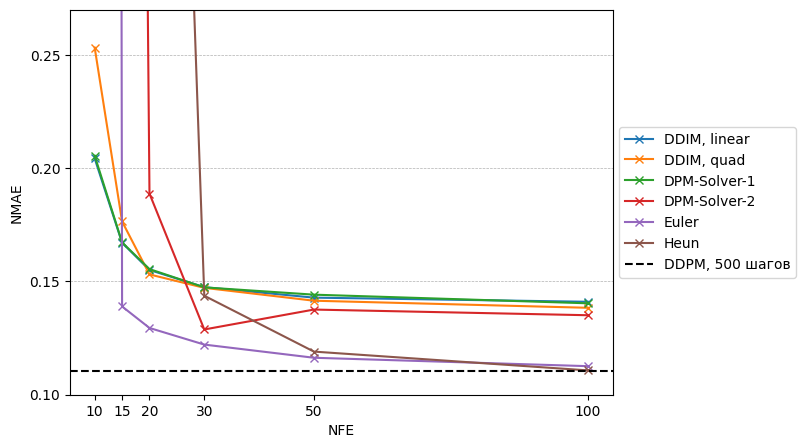

In [6]:
import matplotlib.pyplot as plt
import numpy as np

nfe = [10, 15, 20, 30, 50, 100]
plt.figure(figsize=(7, 5))

for sampler in metrics:
    runs = metrics[sampler]
    nmae = [run['96_test_ND'] for run in runs]
    plt.plot(nfe, nmae, marker='x', linestyle='-', label=sampler)

plt.axhline(y=0.11037103831768036 , linestyle='--', label='DDPM, 500 шагов', c='black')

plt.xlabel('NFE')
plt.xticks(nfe)
plt.ylabel('NMAE')
plt.yticks(np.arange(0.1, 0.271, 0.05))
plt.ylim(0.1, 0.27)
plt.grid(True, which="both", ls="--", linewidth=0.5, axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

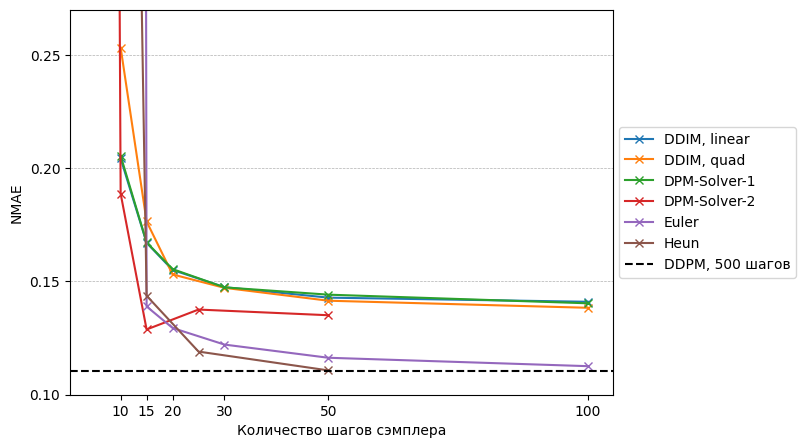

In [5]:
solver_steps = [10, 15, 20, 30, 50, 100]
solver_steps_2ord = [step // 2 for step in solver_steps]
plt.figure(figsize=(7, 5))

for sampler in metrics:
    runs = metrics[sampler]
    nmae = [run['96_test_ND'] for run in runs]
    if sampler in ['Heun', 'DPM-Solver-2']:
        plt.plot(solver_steps_2ord, nmae, marker='x', linestyle='-', label=sampler)
    else:
        plt.plot(solver_steps, nmae, marker='x', linestyle='-', label=sampler)

plt.axhline(y=0.11037103831768036 , linestyle='--', label='DDPM, 500 шагов', c='black')

plt.xlabel('Количество шагов сэмплера')
plt.xticks(nfe)
plt.ylabel('NMAE')
plt.yticks(np.arange(0.1, 0.271, 0.05))
plt.ylim(0.1, 0.27)
plt.grid(True, which="both", ls="--", linewidth=0.5, axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

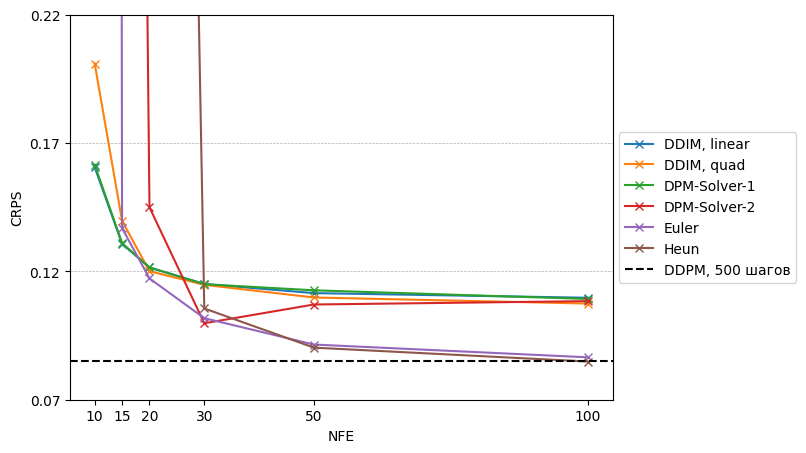

In [10]:
import matplotlib.pyplot as plt
import numpy as np

nfe = [10, 15, 20, 30, 50, 100]
plt.figure(figsize=(7, 5))

for sampler in metrics:
    runs = metrics[sampler]
    crps = [run['96_test_CRPS'] for run in runs]
    plt.plot(nfe, crps, marker='x', linestyle='-', label=sampler)

plt.axhline(y=0.0851731151342392, linestyle='--', label='DDPM, 500 шагов', c='black')

plt.xlabel('NFE')
plt.xticks(nfe)
plt.ylabel('CRPS')
plt.ylim(0.07, 0.22)
plt.yticks(np.arange(0.07, 0.221, 0.05))
plt.grid(True, which="both", ls="--", linewidth=0.5, axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

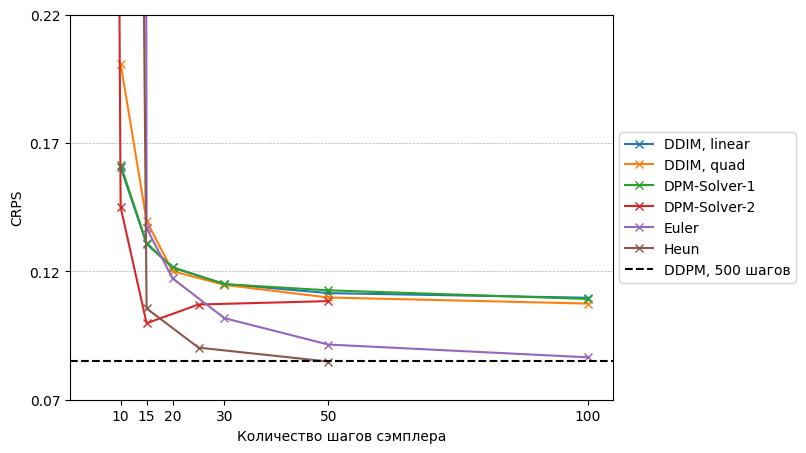

In [14]:
plt.figure(figsize=(7, 5))

for sampler in metrics:
    runs = metrics[sampler]
    crps = [run['96_test_CRPS'] for run in runs]
    if sampler in ['Heun', 'DPM-Solver-2']:
        plt.plot(solver_steps_2ord, crps, marker='x', linestyle='-', label=sampler)
    else:
        plt.plot(solver_steps, crps, marker='x', linestyle='-', label=sampler)

plt.axhline(y=0.0851731151342392, linestyle='--', label='DDPM, 500 шагов', c='black')

plt.xlabel('Количество шагов сэмплера')
plt.xticks(nfe)
plt.ylabel('CRPS')
plt.ylim(0.07, 0.22)
plt.yticks(np.arange(0.07, 0.221, 0.05))
plt.grid(True, which="both", ls="--", linewidth=0.5, axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));